In [1]:
#photometry pre-processing and behavior 
# your data
mouse           = 'N5' 
date            = '2023-08-31' 
region          = 'Region4G' 
main_path       = '/home/kcenia/Documents/Photometry_results/' + date + '/' 
session_path    = main_path+'raw_photometry2.csv' 
session_path_behav = main_path + mouse + '/'
io_path         = main_path+'bonsai_DI12.csv' 
init_idx = 100 

In [2]:
# imports and loading data
from photometry_processing_new_functions import * 
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import neurodsp.utils

""" PHOTOMETRY """
df_PhotometryData = pd.read_csv(session_path) 
df_ph = pd.read_csv(io_path)  # Index(['Timestamp', 'Value.Seconds', 'Value.Value'], dtype='object') 

""" BEHAVIOR """ 
# Alternative1
# df_trials = pd.read_parquet(main_path + mouse + '/alf/_ibl_trials.table.pqt') 

# Alternative2 
from one.api import ONE 
one = ONE(mode="remote") #new way to load the data KB 01092023
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from brainbox.behavior.training import compute_performance 

In [3]:
# Alternative2 loading the behavior data
eids = one.search(subject='ZFM-06275') 
len(eids)
eid = eids[23]
ref = one.eid2ref(eid)
print(ref)

{'subject': 'ZFM-06275', 'date': datetime.date(2023, 8, 31), 'sequence': 1}


In [4]:
# Alternative2 loading the behavior data
trials = one.load_object(eid, 'trials') 
#trials.keys()

# Define the columns you want to include
columns = ['included', 'stimOnTrigger_times', 'goCueTrigger_times', 'repNum', 'goCue_times', 'response_times', 'choice', 'stimOn_times', 'contrastLeft', 'contrastRight', 'feedback_times', 'feedbackType', 'rewardVolume', 'probabilityLeft', 'firstMovement_times', 'intervals']

# Create a DataFrame with the selected columns
test = pd.DataFrame(trials, columns=columns[0:15]) 

# Extract intervals as separate columns
test["intervals_0"] = trials["intervals"][:,0]
test["intervals_1"] = trials["intervals"][:,1]  

df_alldata = pd.DataFrame(test) 
df_trials = df_alldata
df_alldata


,included,stimOnTrigger_times,goCueTrigger_times,repNum,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,intervals_0,intervals_1
0,NaN,8.725900,8.826000,0,8.892600,33.497600,1.0,9.018600,NaN,0.5,33.529700,-1.0,0.0,0.5,NaN,4.641400,36.566802
1,NaN,37.662100,37.717900,1,37.734200,45.945100,1.0,37.717800,NaN,0.5,45.980200,-1.0,0.0,0.5,NaN,37.207400,49.001002
2,NaN,50.232700,50.299400,2,50.317700,92.110300,1.0,50.299300,0.5,NaN,92.110400,1.0,1.5,0.5,NaN,49.559600,94.264902
3,NaN,95.632600,95.699900,0,95.717400,96.767300,-1.0,95.699800,0.5,NaN,96.798500,-1.0,0.0,0.5,95.865197,94.966200,99.833002
4,NaN,101.564100,101.631700,1,101.648100,102.850200,-1.0,101.631600,NaN,0.5,102.850300,1.0,1.5,0.5,102.227197,100.364300,105.016202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,NaN,2765.452099,2765.515799,0,2765.533399,2772.704699,1.0,2765.515699,1.0,NaN,2772.704799,1.0,1.5,0.5,2772.420197,2764.470299,2774.865401
233,NaN,2776.004499,2776.064299,0,2776.083699,2781.396399,1.0,2776.064199,1.0,NaN,2781.396499,1.0,1.5,0.5,2780.937197,2775.415999,2783.564901
234,NaN,2784.592899,2784.663699,0,2784.683799,2792.946799,-1.0,2784.663599,1.0,NaN,2792.977799,-1.0,0.0,0.5,2792.833197,2784.106899,2796.013501
235,NaN,2797.259599,2797.331599,1,2797.356299,2797.880499,1.0,2797.331499,1.0,NaN,2797.880599,1.0,1.5,0.5,2797.458197,2796.571499,2800.048001


In [5]:
# CONTRAST LEFT ARE NEGATIVE VALUES IN THE NEW COLUMN allContrasts 
def all_contrasts(df_alldata): 
    df_alldata_2 = df_alldata.reset_index(drop=True)
    array1 = np.array(df_alldata_2["contrastLeft"])
    array3 = np.array(df_alldata_2["contrastRight"]) 
    df_alldata_2["allContrasts"] = 100
    for i in range(0,len(array1)): 
        if array1[i] == 0. or array1[i] == 0.0625 or array1[i] == 0.125 or array1[i] == 0.25 or array1[i] == 0.5 or array1[i] == 1.0: #edited with 0.5 included 20230814
            df_alldata_2["allContrasts"][i] = array1[i] * (-1)
        else: 
            df_alldata_2["allContrasts"][i] = array3[i]
    return(df_alldata_2) 

df_alldata = all_contrasts(df_alldata) 
df_alldata

/tmp/ipykernel_357917/4096587780.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alldata_2["allContrasts"][i] = array3[i]


,included,stimOnTrigger_times,goCueTrigger_times,repNum,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,intervals_0,intervals_1,allContrasts
0,NaN,8.725900,8.826000,0,8.892600,33.497600,1.0,9.018600,NaN,0.5,33.529700,-1.0,0.0,0.5,NaN,4.641400,36.566802,0.5
1,NaN,37.662100,37.717900,1,37.734200,45.945100,1.0,37.717800,NaN,0.5,45.980200,-1.0,0.0,0.5,NaN,37.207400,49.001002,0.5
2,NaN,50.232700,50.299400,2,50.317700,92.110300,1.0,50.299300,0.5,NaN,92.110400,1.0,1.5,0.5,NaN,49.559600,94.264902,-0.5
3,NaN,95.632600,95.699900,0,95.717400,96.767300,-1.0,95.699800,0.5,NaN,96.798500,-1.0,0.0,0.5,95.865197,94.966200,99.833002,-0.5
4,NaN,101.564100,101.631700,1,101.648100,102.850200,-1.0,101.631600,NaN,0.5,102.850300,1.0,1.5,0.5,102.227197,100.364300,105.016202,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,NaN,2765.452099,2765.515799,0,2765.533399,2772.704699,1.0,2765.515699,1.0,NaN,2772.704799,1.0,1.5,0.5,2772.420197,2764.470299,2774.865401,-1.0
233,NaN,2776.004499,2776.064299,0,2776.083699,2781.396399,1.0,2776.064199,1.0,NaN,2781.396499,1.0,1.5,0.5,2780.937197,2775.415999,2783.564901,-1.0
234,NaN,2784.592899,2784.663699,0,2784.683799,2792.946799,-1.0,2784.663599,1.0,NaN,2792.977799,-1.0,0.0,0.5,2792.833197,2784.106899,2796.013501,-1.0
235,NaN,2797.259599,2797.331599,1,2797.356299,2797.880499,1.0,2797.331499,1.0,NaN,2797.880599,1.0,1.5,0.5,2797.458197,2796.571499,2800.048001,-1.0


/tmp/ipykernel_357917/1902422428.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


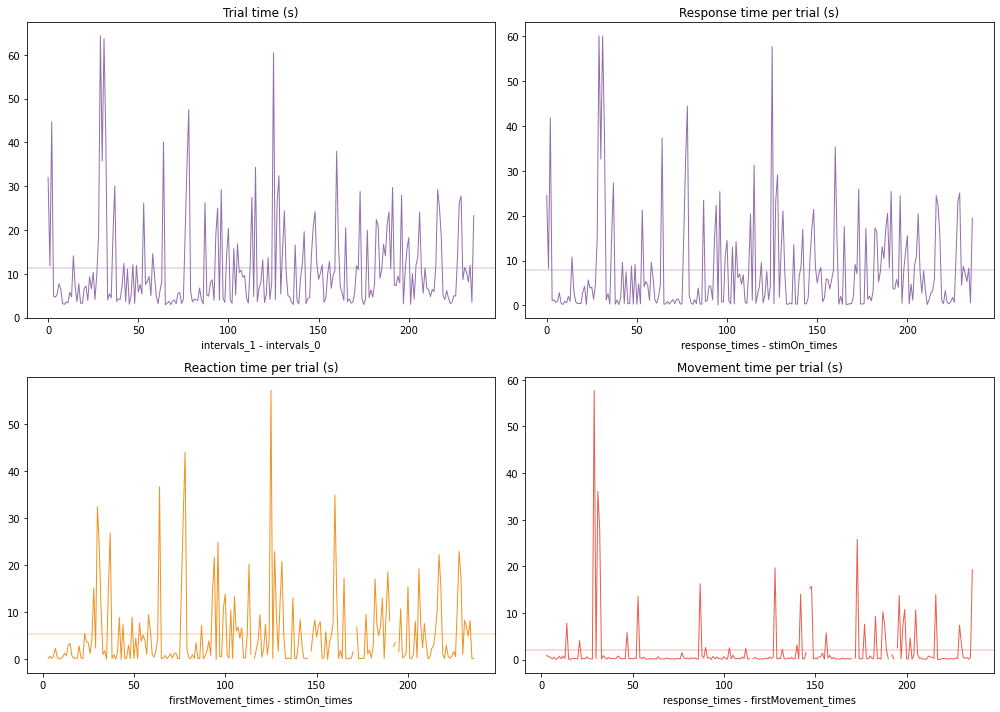

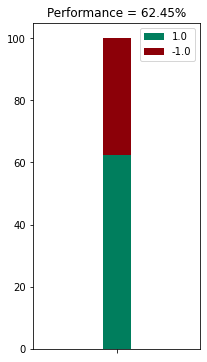

In [6]:

def plot_check_behav(df_alldata): 
    b = df_alldata
    fig, axs = plt.subplots(2, 2,figsize=(14,10)) 

    axs[0, 0].plot(b.intervals_1-b.intervals_0, alpha=1, color = '#936fac',linewidth=1) 
    axs[0, 0].axhline(y=(b.intervals_1-b.intervals_0).mean(), color = '#936fac', alpha=0.3)
    axs[0, 0].set_title('Trial time (s)')
    axs[0, 0].set(xlabel="intervals_1 - intervals_0") 

    axs[0, 1].plot(b.response_times-b.stimOn_times, alpha=1, color = '#936fac',linewidth=1) 
    axs[0, 1].axhline(y=(b.response_times-b.stimOn_times).mean(), color = '#936fac', alpha=0.3)
    axs[0, 1].set_title('Response time per trial (s)')
    axs[0, 1].set(xlabel="response_times - stimOn_times") 

    axs[1, 0].plot(b.firstMovement_times-b.stimOn_times, alpha=1, color = '#f29222',linewidth=1) 
    axs[1, 0].axhline(y=(b.firstMovement_times-b.stimOn_times).mean(), color = '#f29222', alpha=0.3)
    axs[1, 0].set_title('Reaction time per trial (s)')
    axs[1, 0].set(xlabel="firstMovement_times - stimOn_times")

    axs[1, 1].plot(b.response_times-b.firstMovement_times, alpha=1, color = '#e95e50',linewidth=1) 
    axs[1, 1].axhline(y=(b.response_times-b.firstMovement_times).mean(), color = '#e95e50', alpha=0.3)
    axs[1, 1].set_title('Movement time per trial (s)')
    axs[1, 1].set(xlabel="response_times - firstMovement_times") 

    # axs[0, 1].hist(b.quiescence, bins = 10,alpha=1, color='#A0C4FF')
    # axs[0, 1].set_title('Quiescence period (s)') 
    # axs[0, 1].set(xlabel="quiescence") 

    # axs[1, 1].hist(b.rewardVolume,alpha=1, color='#9BF6FF')
    # axs[1, 1].set_title('Quiescence period (s)')
    # axs[1, 1].set(xlabel="quiescence") 
    fig.tight_layout()
    fig.show()

plot_check_behav(df_alldata) 

freq = df_alldata["feedbackType"].value_counts(normalize=True)*100
plt.rcParams["figure.figsize"] = (3,6)
freq.to_frame().T.plot.bar(stacked=True, color=["#007e5d","#8c0008"],width=0.1)
a = (len(df_alldata.feedbackType[df_alldata.feedbackType==1])/len(df_alldata.feedbackType)*100)
plt.title("Performance = "+str((round(a,2)))+"%")
plt.gca().set_xticklabels([])
plt.show()


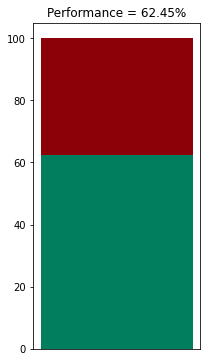

In [7]:
#chatgpt 06102023
# import matplotlib.pyplot as plt

# Calculate the performance percentage
correct_count = (df_alldata["feedbackType"] == 1).sum()
total_trials = len(df_alldata)
performance_percentage = (correct_count / total_trials) * 100

# Create the bar plot
plt.figure(figsize=(3, 6))
plt.bar(x=["Performance"], height=[performance_percentage], color=["#007e5d"], width=0.1)

# Add the incorrect percentage as a stacked bar
incorrect_percentage = 100 - performance_percentage
plt.bar(x=["Performance"], height=[incorrect_percentage], bottom=[performance_percentage], color=["#8c0008"], width=0.1)

# Set the title
plt.title(f"Performance = {performance_percentage:.2f}%")

# Hide x-axis labels
plt.xticks([])

# Show the plot
plt.show()

/tmp/ipykernel_357917/3447216803.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alldata[new_var_inc][i] = (df_alldata[new_var][i])
/tmp/ipykernel_357917/3447216803.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alldata[new_var_c][i] = (df_alldata[new_var][i])
/tmp/ipykernel_357917/3447216803.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alldata[new_var_inc][i] = (df_alldata[new_var][i])
/tmp/ipykernel_357917

reactionTime  mean time correct =  5.549424583365262  | mean time incorrect =  4.976594091893034
responseTime  mean time correct =  7.7695466216216085  | mean time incorrect =  7.845449438202226
responseTime_mov  mean time correct =  1.8140285200830002  | mean time incorrect =  2.450836860487896


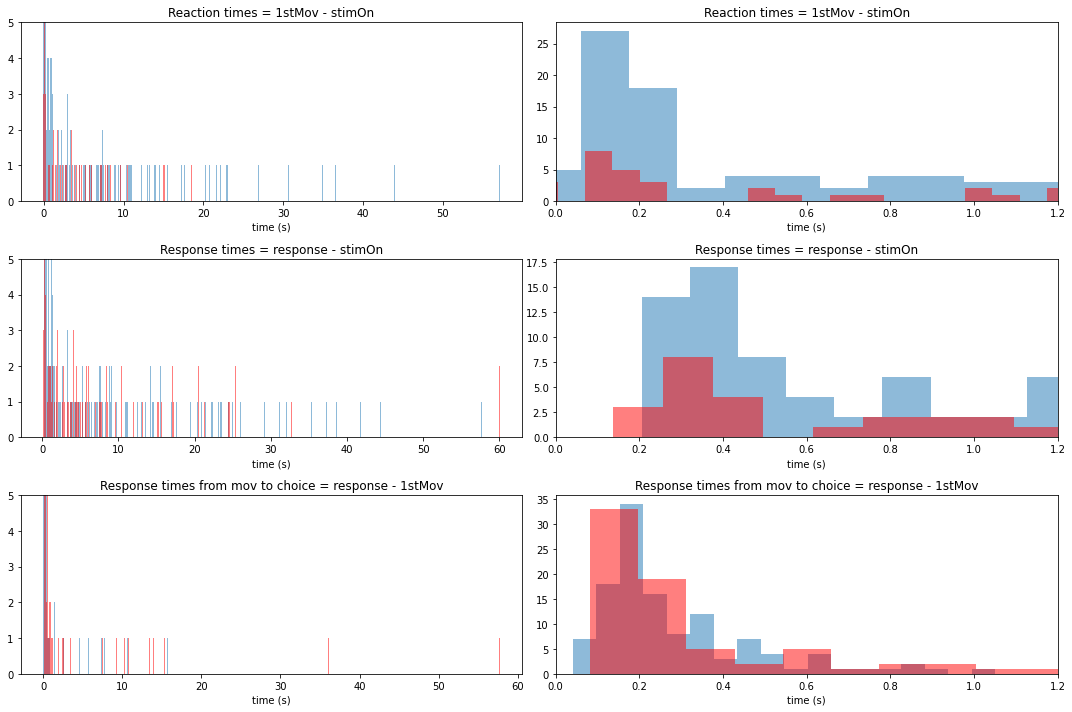

In [8]:
# creating reaction and response time variables 
    #reaction = first mov after stim onset 
def new_time_vars(df_alldata,new_var="test",second_action="firstMovement_times",first_action = "stimOn_times"): 
    df = df_alldata
    df[new_var] = df[second_action] - df[first_action] 
    return df 

# splitting the new_time_vars into correct and incorrect in the df and plotting the histogram/density 
def new_time_vars_c_inc(df_alldata,new_var="reactionTime"): 
    new_var_c = str(new_var+"_c") 
    new_var_inc = str(new_var+"_inc")
    df_alldata[new_var_c] = np.nan
    df_alldata[new_var_inc] = np.nan
    for i in range(0,len(df_alldata[new_var])): 
        if df_alldata["feedbackType"][i] == 1: 
            df_alldata[new_var_c][i] = (df_alldata[new_var][i])
        else: 
            df_alldata[new_var_inc][i] = (df_alldata[new_var][i]) 
    print(new_var," mean time correct = ", np.mean(df_alldata[new_var_c]), " | mean time incorrect = ", np.mean(df_alldata[new_var_inc]))
    return df_alldata 

def show_plot(df_alldata): 
    reactionTime_c_a = np.array(df_alldata.reactionTime_c)
    reactionTime_inc_a = np.array(df_alldata.reactionTime_inc)
    responseTime_c_a = np.array(df_alldata.responseTime_c)
    responseTime_inc_a = np.array(df_alldata.responseTime_inc)
    responseTime_mov_c_a = np.array(df_alldata.responseTime_mov_c)
    responseTime_mov_inc_a = np.array(df_alldata.responseTime_mov_inc)
    mean_A_c = np.nanmean(reactionTime_c_a)
    mean_A_inc = np.nanmean(reactionTime_inc_a)
    mean_B_c = np.nanmean(responseTime_c_a) 
    mean_B_inc = np.nanmean(responseTime_inc_a) 
    mean_C_c = np.nanmean(responseTime_mov_c_a)
    mean_c_inc = np.nanmean(responseTime_mov_inc_a)
    std_A_c = np.nanstd(reactionTime_c_a)
    std_A_inc = np.nanstd(reactionTime_inc_a)
    std_B_c = np.nanstd(responseTime_c_a) 
    std_B_inc = np.nanstd(responseTime_inc_a) 
    std_C_c = np.nanstd(responseTime_mov_c_a)
    std_c_inc = np.nanstd(responseTime_mov_inc_a)
    materials = ['rT_c','rT_inc',' ','rsT_c','rsT_inc',' ','rsT_m_c','rsT_m_inc']
    x_pos = np.arange(len(materials)) 
    CTEs = [round(mean_A_c,2),round(mean_A_inc,2),np.nan,round(mean_B_c,2),round(mean_B_inc,2),np.nan,round(mean_C_c,2),round(mean_c_inc,2)] 
    error = [std_A_c,std_A_inc,np.nan,std_B_c,std_B_inc,np.nan,std_C_c,std_c_inc]
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'left', size = 15)
    c = ['#C1D3FE', '#FFB9AA', 'red', '#ABD9D9', '#FFC19F', 'red', '#ACD8AA', '#FFCB9E']
    # Build the plot
    sns.set(style = "ticks") 
    fig, ax = plt.subplots()
    ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.95, color=c, capsize=10) #ecolor=c, 
    ax.set_ylabel('Mean values for correct and incorrect', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(materials,fontsize=13)
    addlabels(materials, CTEs)
    ax.set_title('ReactionTime | ResponseTime | ResponseTime from 1stmov', fontsize=15)
    ax.set_ylim(0)
    ax.yaxis.grid(False) 
    sns.despine(left = False, bottom = False) 
    plt.tight_layout()
    plt.show() 

def plot_reactions_and_responses(df_alldata): 
    df_alldata = df_alldata
    fig, axs = plt.subplots(3, 2,figsize=(15,10)) 
    axs[0, 0].hist(df_alldata.reactionTime, bins = 50,alpha=0.8, color='#4B8EB3')
    axs[0, 0].set_title('Reaction times = 1stMov - stimOn')
    axs[0, 1].hist(df_alldata.reactionTime, bins = 1000,alpha=0.8,color='#4B8EB3') 
    axs[0, 1].set_title('Reaction times = 1stMov - stimOn zoomed in')
    axs[0, 1].set_xlim([0,1.2])
    axs[1, 0].hist(df_alldata.responseTime, bins = 50,alpha=0.8, color='#f9a620')
    axs[1, 0].set_title('Response times = response - stimOn')
    axs[1, 1].hist(df_alldata.responseTime, bins = 1000,alpha=0.8, color='#f9a620') 
    axs[1, 1].set_title('Response times = response - stimOn zoomed in')
    axs[1, 1].set_xlim([0,1.2])
    axs[2, 0].hist(df_alldata.responseTime_mov, bins = 50,alpha=0.8, color='#7cb518')
    axs[2, 0].set_title('Response times since mov = response - 1stmov')
    axs[2, 1].hist(df_alldata.responseTime_mov, bins = 1000,alpha=0.8, color='#7cb518') 
    axs[2, 1].set_title('Response times since mov = response - 1stmov zoomed in')
    axs[2, 1].set_xlim([0,1.2])
    for ax in axs.flat:
        ax.set(xlabel='time (s)') 
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    fig.tight_layout()
    plt.show() 

def plot_reactions_and_responses_diff(df_alldata): 
    fig, axs = plt.subplots(3, 2,figsize=(15,10)) 
    axs[0, 0].hist(df_alldata.reactionTime_c, bins = 500,alpha=0.5)
    axs[0, 0].hist(df_alldata.reactionTime_inc, bins = 500,alpha=0.5,color='red')
    axs[0, 0].set_title('Reaction times = 1stMov - stimOn')
    axs[0, 0].set_ylim([0,5])
    axs[0, 1].hist(df_alldata.reactionTime_c, bins = 500,alpha=0.5)
    axs[0, 1].hist(df_alldata.reactionTime_inc, bins = 500,alpha=0.5,color='red')
    axs[0, 1].set_title('Reaction times = 1stMov - stimOn')
    axs[0, 1].set_xlim([0,1.2])
    axs[1, 0].hist(df_alldata.responseTime_c, bins = 500,alpha=0.5)
    axs[1, 0].hist(df_alldata.responseTime_inc, bins = 500,alpha=0.5,color='red')
    axs[1, 0].set_title('Response times = response - stimOn')
    axs[1, 0].set_ylim([0,5])
    axs[1, 1].hist(df_alldata.responseTime_c, bins = 500,alpha=0.5)
    axs[1, 1].hist(df_alldata.responseTime_inc, bins = 500,alpha=0.5,color='red')
    axs[1, 1].set_title('Response times = response - stimOn')
    axs[1, 1].set_xlim([0,1.2])
    axs[2, 0].hist(df_alldata.responseTime_mov_c, bins = 500,alpha=0.5)
    axs[2, 0].hist(df_alldata.responseTime_mov_inc, bins = 500,alpha=0.5,color='red')
    axs[2, 0].set_title('Response times from mov to choice = response - 1stMov')
    axs[2, 0].set_ylim([0,5])
    axs[2, 1].hist(df_alldata.responseTime_mov_c, bins = 500,alpha=0.5)
    axs[2, 1].hist(df_alldata.responseTime_mov_inc, bins = 500,alpha=0.5,color='red')
    axs[2, 1].set_title('Response times from mov to choice = response - 1stMov')
    axs[2, 1].set_xlim([0,1.2])
    for ax in axs.flat:
        ax.set(xlabel='time (s)') 
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    # for ax in axs.flat:
    #     ax.label_outer()
    fig.tight_layout()
    plt.show()

# creating reaction and response time variables 
    #reaction = first mov after stim onset 
df_alldata = new_time_vars(df_alldata,new_var="reactionTime",second_action="firstMovement_times",first_action = "stimOn_times")
    #response = time for the decision/wheel movement, from stim on until choice 
df_alldata = new_time_vars(df_alldata,new_var="responseTime",second_action="response_times",first_action = "stimOn_times")
    #response_mov = time for the decision/wheel movement, from the 1st mov on until choice 
df_alldata = new_time_vars(df_alldata,new_var="responseTime_mov",second_action="response_times",first_action = "firstMovement_times")

df_alldata = new_time_vars_c_inc(df_alldata,new_var="reactionTime") 
df_alldata = new_time_vars_c_inc(df_alldata,new_var="responseTime") 
df_alldata = new_time_vars_c_inc(df_alldata,new_var="responseTime_mov") 

plot_reactions_and_responses_diff(df_alldata)




In [9]:
a=[0]
for i in range(1,len(df_alldata.intervals_0)): 
    a.append(df_alldata.intervals_0[i]-df_alldata.intervals_1[i-1])
    print("a = ",a[i]," | intervals_0_next = ", df_alldata.intervals_0[i], " | intervals_1_currect = ", df_alldata.intervals_1[i-1])


a =  0.6405980000000042  | intervals_0_next =  37.2074  | intervals_1_currect =  36.566801999999996
a =  0.5585980000000035  | intervals_0_next =  49.559599999999996  | intervals_1_currect =  49.00100199999999
a =  0.70129799999998  | intervals_0_next =  94.96619999999999  | intervals_1_currect =  94.264902
a =  0.5312979999999925  | intervals_0_next =  100.36429999999999  | intervals_1_currect =  99.833002
a =  0.5320979999999906  | intervals_0_next =  105.54829999999998  | intervals_1_currect =  105.01620199999999
a =  0.5370979999999861  | intervals_0_next =  111.36849999999998  | intervals_1_currect =  110.831402
a =  0.5589980000000025  | intervals_0_next =  119.60819999999998  | intervals_1_currect =  119.04920199999998
a =  0.5359980000000064  | intervals_0_next =  126.7004  | intervals_1_currect =  126.164402
a =  0.5219969999999989  | intervals_0_next =  130.46949999999998  | intervals_1_currect =  129.94750299999998
a =  0.5217979999999898  | intervals_0_next =  133.969399999

In [10]:
# # tph is the photometry TTL data
# # tbpod is the bpod TTL data 
# tph = import_DI(io_path).values[:, 0]
# tbpod = np.sort(np.r_[df_trials['intervals_0'].values, df_trials['intervals_1'].values, df_trials.loc[df_trials['feedbackType'] == 1, 'feedback_times'].values])

max deviation: 0.0 drift:  -19.91287545822433 ppm


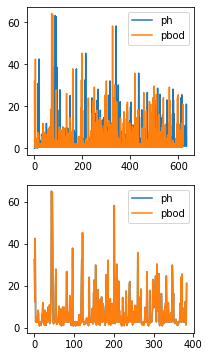

In [11]:
#                   5. INTERPOLATE BPOD AND NPH TIME
mouse           = 'N5' 
date            = '2023-08-31' 
region          = 'Region4G' 
main_path       = '/home/kcenia/Documents/Photometry_results/' + date + '/' 
session_path    = main_path+'raw_photometry2.csv' 
session_path_behav = main_path + mouse + '/'
io_path         = main_path+'bonsai_DI12.csv' 
init_idx = 100 

root_path = main_path
#session_path_behav = Path('/mnt/s0/Data/Subjects/ZFM-06275/2023-08-31/001/')
df_trials = pd.read_parquet(main_path + mouse + '/alf/_ibl_trials.table.pqt')

photometry_path = session_path

df_ph = pd.read_csv(io_path)  # Index(['Timestamp', 'Value.Seconds', 'Value.Value'], dtype='object')

def import_DI(io_path):
    """
    input = raw DI data (TTL)
    output = "Timestamp"; DI TTL times, only True values, this means only ups

     > columns:
         * old ones = "Seconds"
         * new ones = "Timestamp"
    """
    df_DI0 = pd.read_csv(io_path)
    if 'Value.Value' in df_DI0.columns: #for the new ones
        df_DI0 = df_DI0.rename(columns={"Value.Seconds": "Seconds", "Value.Value": "Value"})
    else:
        df_DI0["Timestamp"] = df_DI0["Seconds"] #for the old ones
    #use Timestamp from this part on, for any of the files
    raw_phdata_DI0_true = df_DI0[df_DI0.Value==True]
    df_raw_phdata_DI0_T_timestamp = pd.DataFrame(raw_phdata_DI0_true, columns=["Timestamp"])
    df_raw_phdata_DI0_T_timestamp = df_raw_phdata_DI0_T_timestamp.reset_index(drop=True)
    return(df_raw_phdata_DI0_T_timestamp)


## %%
import matplotlib.pyplot as plt
import numpy as np

tph = import_DI(io_path).values[:, 0]
tbpod = np.sort(np.r_[df_trials['intervals_0'].values, df_trials['intervals_1'].values, df_trials.loc[df_trials['feedbackType'] == 1, 'feedback_times'].values])



# plotting tnph and tbpod
fig, axs = plt.subplots(2, 1)
axs[0].plot(np.diff(tph))
axs[0].plot(np.diff(tbpod))
axs[0].legend(['ph', 'pbod'])

fcn_nph_to_bpod_times, drift_ppm, iph, ibpod = neurodsp.utils.sync_timestamps(tph, tbpod, return_indices=True)

print('max deviation:', np.max(np.abs(fcn_nph_to_bpod_times(tph[iph]) - tbpod[ibpod]) * 1e6), 'drift: ', drift_ppm, 'ppm')

#fcn_nph_to_bpod_times  # apply this function to whatever photometry timestamps

axs[1].plot(np.diff(fcn_nph_to_bpod_times(tph[iph])))
axs[1].plot(np.diff(tbpod[ibpod]))
axs[1].legend(['ph', 'pbod'])

In [12]:
df_trials.columns

Index(['intervals_0', 'intervals_1', 'goCue_times', 'response_times', 'choice',
       'stimOn_times', 'contrastLeft', 'contrastRight', 'feedback_times',
       'feedbackType', 'rewardVolume', 'probabilityLeft',
       'firstMovement_times'],
      dtype='object')

In [13]:
intervals_0_event = np.sort(np.r_[df_trials['intervals_0'].values]) 
len(intervals_0_event)



237

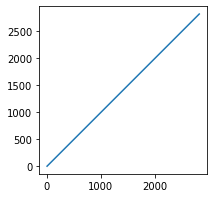

In [14]:
# transform the nph TTL times into bpod times 
nph_sync = fcn_nph_to_bpod_times(tph[iph]) 
bpod_times = tbpod[ibpod] 
bpod_sync = bpod_times
bpod_1event_times = tbpod[ibpod]
nph_to_bpod = nph_sync
fig1, ax = plt.subplots()

ax.set_box_aspect(1)
plt.plot(nph_to_bpod, bpod_1event_times) 
plt.show()

df_PhotometryData["bpod_frame_times_feedback_times"] = fcn_nph_to_bpod_times(df_PhotometryData["Timestamp"])

In [15]:
len(bpod_sync)

385

In [16]:
df_alldata.columns

Index(['included', 'stimOnTrigger_times', 'goCueTrigger_times', 'repNum',
       'goCue_times', 'response_times', 'choice', 'stimOn_times',
       'contrastLeft', 'contrastRight', 'feedback_times', 'feedbackType',
       'rewardVolume', 'probabilityLeft', 'firstMovement_times', 'intervals_0',
       'intervals_1', 'allContrasts', 'reactionTime', 'responseTime',
       'responseTime_mov', 'reactionTime_c', 'reactionTime_inc',
       'responseTime_c', 'responseTime_inc', 'responseTime_mov_c',
       'responseTime_mov_inc'],
      dtype='object')

In [17]:
print(df_alldata.feedback_times)

0        33.529700
1        45.980200
2        92.110400
3        96.798500
4       102.850300
          ...     
232    2772.704799
233    2781.396499
234    2792.977799
235    2797.880599
236    2821.665499
Name: feedback_times, Length: 237, dtype: float64


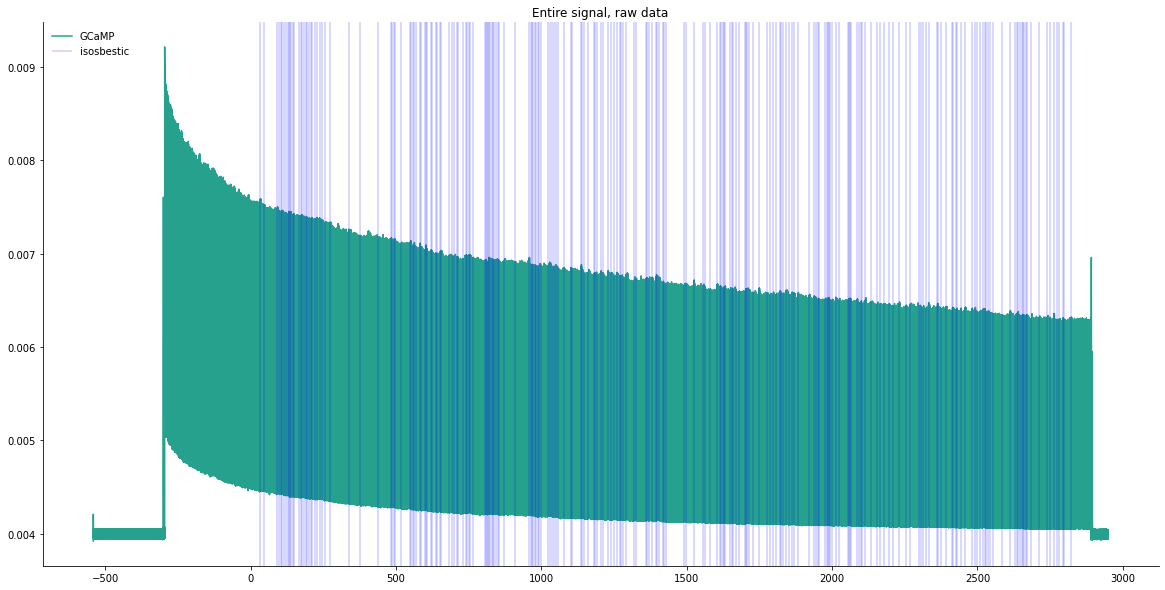

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(df_PhotometryData.bpod_frame_times_feedback_times, df_PhotometryData.Region4G,color = "#25a18e") 

xcoords = df_alldata.feedback_times
for xc in zip(xcoords):
    plt.axvline(x=xc, color='blue',linewidth=0.3)
plt.title("Entire signal, raw data")
plt.legend(["GCaMP","isosbestic"],frameon=False)
sns.despine(left = False, bottom = False) 
# plt.axvline(x=init_idx) 
# plt.axvline(x=end_idx) 
plt.show()

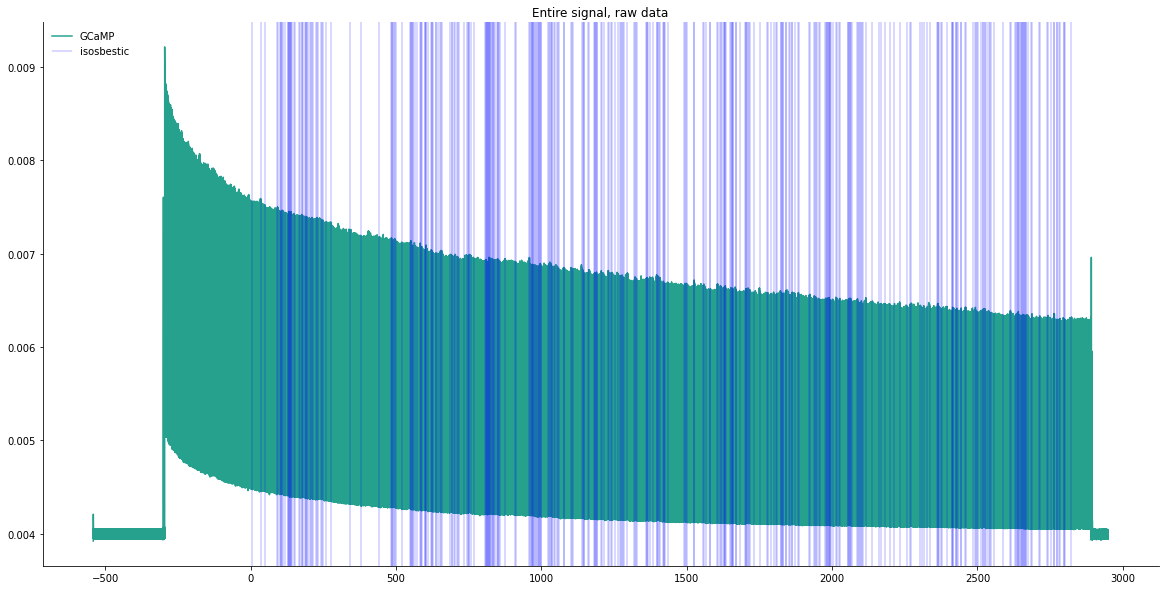

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(df_PhotometryData.bpod_frame_times_feedback_times, df_PhotometryData.Region4G,color = "#25a18e") 

xcoords = nph_sync
for xc in zip(xcoords):
    plt.axvline(x=xc, color='blue',linewidth=0.3)
plt.title("Entire signal, raw data")
plt.legend(["GCaMP","isosbestic"],frameon=False)
sns.despine(left = False, bottom = False) 
# plt.axvline(x=init_idx) 
# plt.axvline(x=end_idx) 
plt.show()

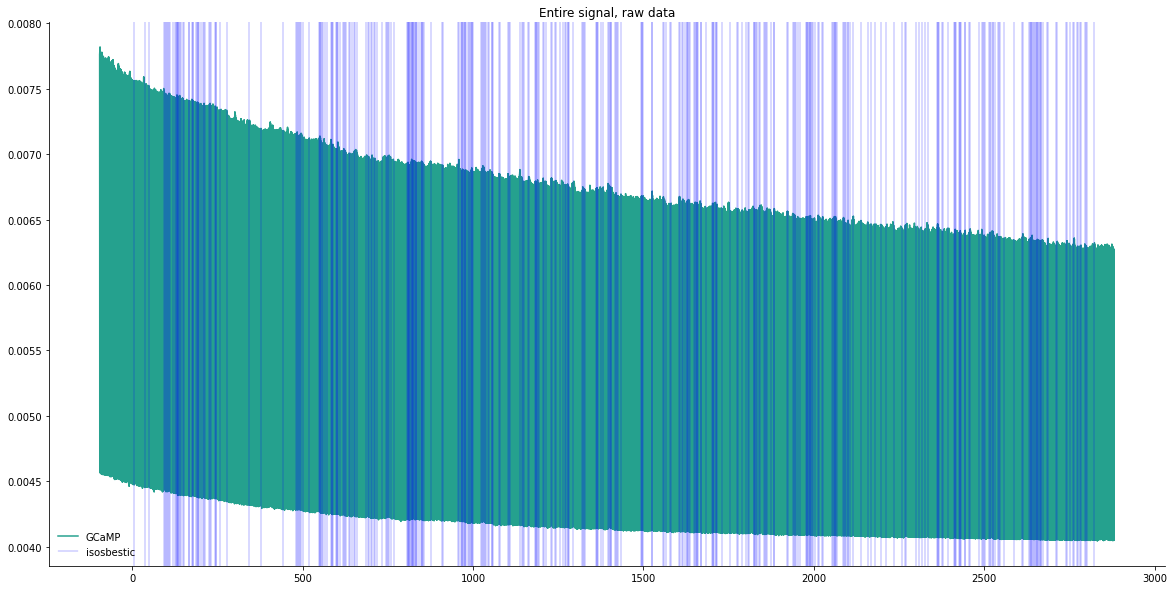

In [20]:
# Assuming nph_sync contains the timestamps in seconds
nph_sync_start = nph_sync[0] - 100  # Start time, 100 seconds before the first nph_sync value
nph_sync_end = nph_sync[-1] + 60   # End time, 100 seconds after the last nph_sync value

# Select data within the specified time range
selected_data = df_PhotometryData[
    (df_PhotometryData['bpod_frame_times_feedback_times'] >= nph_sync_start) &
    (df_PhotometryData['bpod_frame_times_feedback_times'] <= nph_sync_end)
]

# Now, selected_data contains the rows of df_PhotometryData within the desired time range 
selected_data 

# Plotting the new filtered data 
plt.figure(figsize=(20, 10))
plt.plot(selected_data.bpod_frame_times_feedback_times, selected_data.Region4G,color = "#25a18e") 

xcoords = nph_sync
for xc in zip(xcoords):
    plt.axvline(x=xc, color='blue',linewidth=0.3)
plt.title("Entire signal, raw data")
plt.legend(["GCaMP","isosbestic"],frameon=False)
sns.despine(left = False, bottom = False) 
# plt.axvline(x=init_idx) 
# plt.axvline(x=end_idx) 
plt.show()

In [21]:
df_PhotometryData = selected_data

In [22]:
df_PhotometryData

,FrameCounter,Timestamp,LedState,Stimulation,Output0,Output1,Input0,Input1,Region0R,Region1G,Region2R,Region3G,Region4G,Region5G,bpod_frame_times_feedback_times
26760,26760,9979.068064,1,0,1,0,0,0,0.003922,0.003922,0.003922,0.005025,0.007762,0.004037,-95.356491
26761,26761,9979.084704,2,0,1,0,0,0,0.003922,0.003922,0.006536,0.004568,0.004608,0.003925,-95.339851
26762,26762,9979.101376,1,0,1,0,0,0,0.003922,0.003922,0.003922,0.005035,0.007762,0.004038,-95.323179
26763,26763,9979.118048,2,0,1,0,0,0,0.003922,0.003922,0.006972,0.004577,0.004606,0.003925,-95.306507
26764,26764,9979.134720,1,0,1,0,0,0,0.003922,0.003922,0.003922,0.005018,0.007771,0.004038,-95.289835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205386,205386,12956.081952,1,0,1,0,0,0,0.003922,0.003922,0.003922,0.004165,0.006265,0.003991,2881.582309
205387,205387,12956.098624,2,0,1,0,0,0,0.003922,0.003922,0.005229,0.004006,0.004058,0.003922,2881.598976
205388,205388,12956.115296,1,0,1,0,0,0,0.003922,0.003922,0.003922,0.004163,0.006260,0.003989,2881.615644
205389,205389,12956.131968,2,0,1,0,0,0,0.003922,0.003922,0.006100,0.004004,0.004052,0.003922,2881.632312


Option 1: same length :)
470 =  89315  415 =  89315


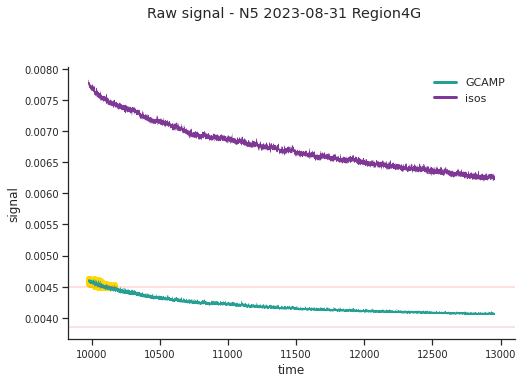

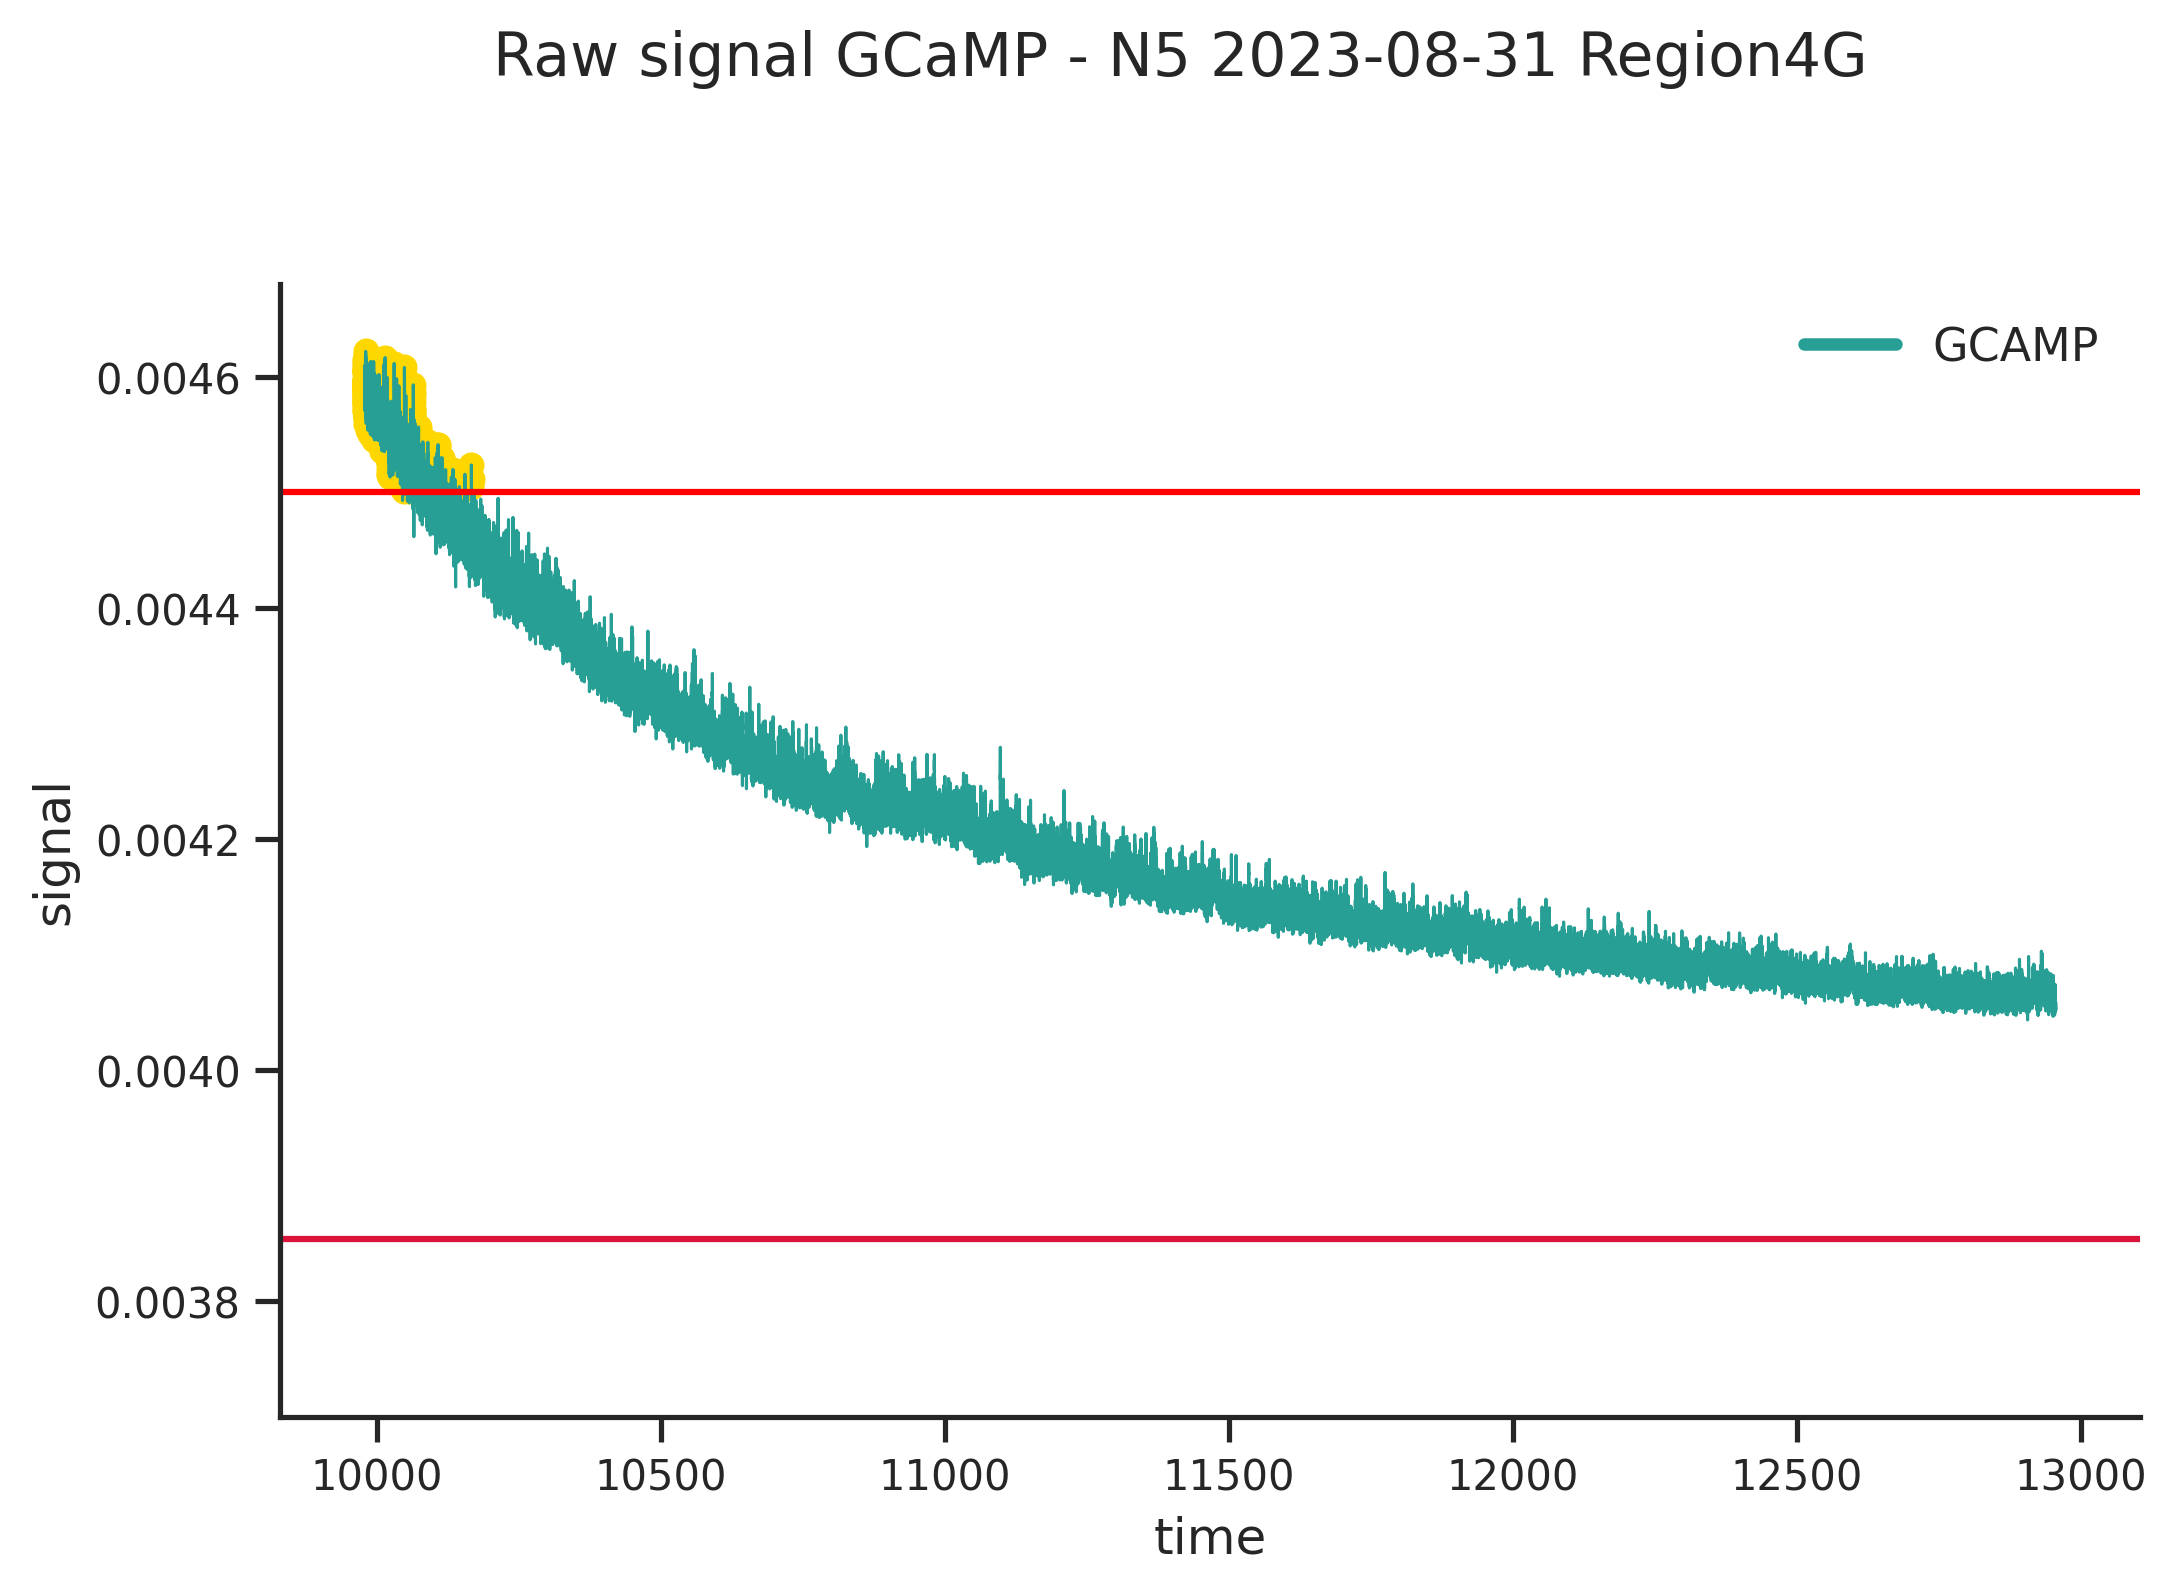

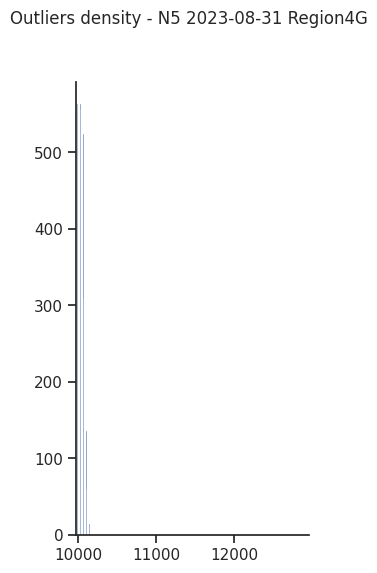

<Figure size 800x500 with 0 Axes>

outliers above:  3.7037451715837206  | outliers below:  0.0


In [23]:
#===========================================================================
#      4. FUNCTIONS TO LOAD DATA AND ADD SOME VARIABLES (BEHAVIOR)
#===========================================================================
df_PhotometryData = df_PhotometryData.reset_index(drop=True)
df_PhotometryData = LedState_or_Flags(df_PhotometryData)

""" 4.1.2 Check for LedState/previous Flags bugs """ 
""" 4.1.2.1 Length """
# Verify the length of the data of the 2 different LEDs
df_470, df_415 = verify_length(df_PhotometryData)
""" 4.1.2.2 Verify if there are repeated flags """ 
verify_repetitions(df_PhotometryData["LedState"])
""" 4.1.3 Remove "weird" data (flag swap, huge signal) """ 
session_day=date
plot_outliers(df_470,df_415,region,mouse,session_day) 


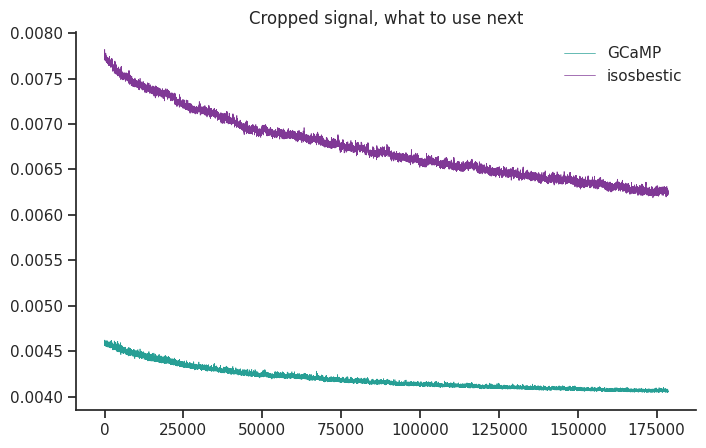

470 = 89315  415 = 89315


In [24]:
# Select a subset of df_PhotometryData and reset the index
df_PhotometryData_1 = df_PhotometryData

# Remove rows with LedState 1 at both ends if present
if df_PhotometryData_1['LedState'].iloc[0] == 1 and df_PhotometryData_1['LedState'].iloc[-1] == 1:
    df_PhotometryData_1 = df_PhotometryData_1.iloc[1:]

# Remove rows with LedState 2 at both ends if present
if df_PhotometryData_1['LedState'].iloc[0] == 2 and df_PhotometryData_1['LedState'].iloc[-1] == 2:
    df_PhotometryData_1 = df_PhotometryData_1.iloc[:-2]

# Filter data for LedState 2 (470nm)
df_470 = df_PhotometryData_1[df_PhotometryData_1['LedState'] == 2]

# Filter data for LedState 1 (415nm)
df_415 = df_PhotometryData_1[df_PhotometryData_1['LedState'] == 1]

# Check if the lengths of df_470 and df_415 are equal
assert len(df_470) == len(df_415), "Sync arrays are of different lengths"

# Plot the data
plt.rcParams["figure.figsize"] = (8, 5)
plt.plot(df_470[region], c='#279F95', linewidth=0.5)
plt.plot(df_415[region], c='#803896', linewidth=0.5)
plt.title("Cropped signal, what to use next")
plt.legend(["GCaMP", "isosbestic"], frameon=False)
sns.despine(left=False, bottom=False)
plt.show()

# Print counts
print("470 =", df_470['LedState'].count(), " 415 =", df_415['LedState'].count())

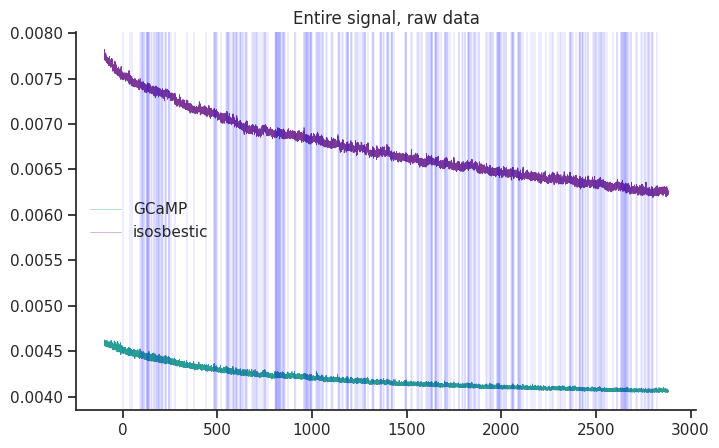

In [25]:
df_470_a = df_PhotometryData[df_PhotometryData.LedState==2] 
df_415_a = df_PhotometryData[df_PhotometryData.LedState==1] 
plt.rcParams["figure.figsize"] = (8,5)  
plt.plot(df_470_a["bpod_frame_times_feedback_times"], df_470_a[region],c='#279F95',linewidth=0.5, alpha=0.5)
plt.plot(df_415_a["bpod_frame_times_feedback_times"], df_470_a[region],c='#803896',linewidth=0.5, alpha=0.5) 
plt.plot(df_470["bpod_frame_times_feedback_times"], df_470[region],c='#279F95',linewidth=0.5)
plt.plot(df_415["bpod_frame_times_feedback_times"], df_415[region],c='#803896',linewidth=0.5) 
xcoords = nph_sync
for xc in zip(xcoords):
    plt.axvline(x=xc, color='blue',linewidth=0.1)
plt.title("Entire signal, raw data")
plt.legend(["GCaMP","isosbestic"],frameon=False)
sns.despine(left = False, bottom = False) 
# plt.axvline(x=init_idx) 
# plt.axvline(x=end_idx) 
plt.show()

In [26]:
df_PhotometryData

,FrameCounter,Timestamp,LedState,Stimulation,Output0,Output1,Input0,Input1,Region0R,Region1G,Region2R,Region3G,Region4G,Region5G,bpod_frame_times_feedback_times
0,26761,9979.084704,2,0,1,0,0,0,0.003922,0.003922,0.006536,0.004568,0.004608,0.003925,-95.339851
1,26762,9979.101376,1,0,1,0,0,0,0.003922,0.003922,0.003922,0.005035,0.007762,0.004038,-95.323179
2,26763,9979.118048,2,0,1,0,0,0,0.003922,0.003922,0.006972,0.004577,0.004606,0.003925,-95.306507
3,26764,9979.134720,1,0,1,0,0,0,0.003922,0.003922,0.003922,0.005018,0.007771,0.004038,-95.289835
4,26765,9979.151392,2,0,1,0,0,0,0.003922,0.003922,0.006972,0.004575,0.004607,0.003924,-95.273163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178625,205386,12956.081952,1,0,1,0,0,0,0.003922,0.003922,0.003922,0.004165,0.006265,0.003991,2881.582309
178626,205387,12956.098624,2,0,1,0,0,0,0.003922,0.003922,0.005229,0.004006,0.004058,0.003922,2881.598976
178627,205388,12956.115296,1,0,1,0,0,0,0.003922,0.003922,0.003922,0.004163,0.006260,0.003989,2881.615644
178628,205389,12956.131968,2,0,1,0,0,0,0.003922,0.003922,0.006100,0.004004,0.004052,0.003922,2881.632312


In [27]:
# %% 
df_PhotometryData = df_PhotometryData_1.reset_index(drop=True)  
df_470 = df_PhotometryData[df_PhotometryData.LedState==2] 
df_470 = df_470.reset_index(drop=True)
df_415 = df_PhotometryData[df_PhotometryData.LedState==1] 
df_415 = df_415.reset_index(drop=True) 
#================================================
""" 4.1.4 FRAME RATE """ 
acq_FR = find_FR(df_470["Timestamp"]) 

All good, the FR is:  30


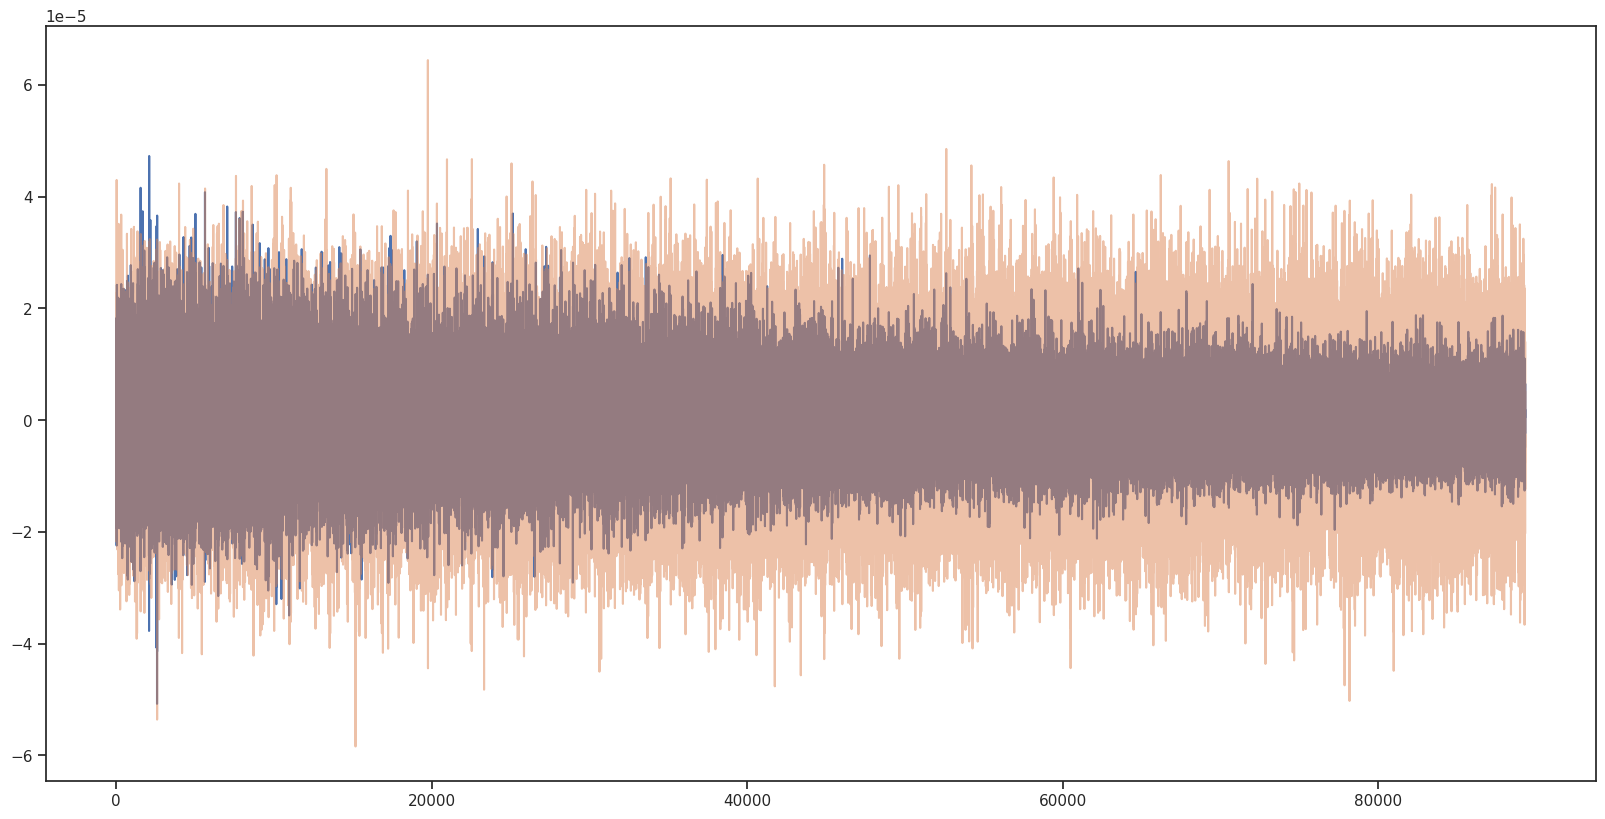

In [152]:
import scipy.signal

raw_reference = df_415[region] #isosbestic 
raw_signal = df_470[region] #GCaMP signal 



sos = scipy.signal.butter(**{'N': 3, 'Wn': 0.05, 'btype': 'highpass'}, output='sos')
butt = scipy.signal.sosfiltfilt(sos, raw_signal) 

plt.plot(butt)
butt = scipy.signal.sosfiltfilt(sos, raw_reference) 
plt.plot(butt,alpha=0.5)
plt.show()


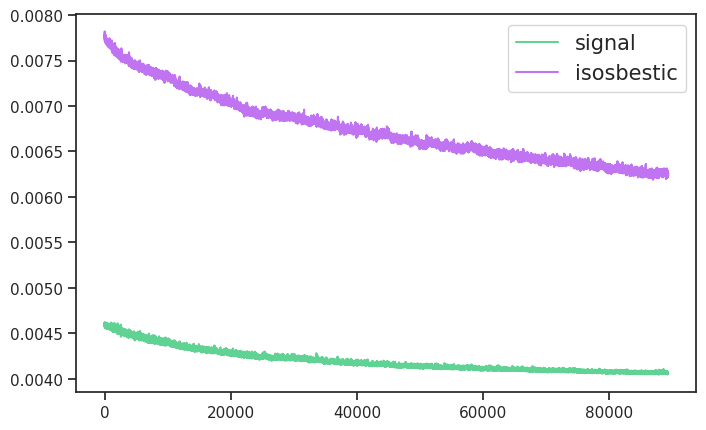

In [28]:
#===========================================================================
#                       6. PHOTOMETRY SIGNAL PROCESSING
#===========================================================================
#===========================================================================
# *                            INFO HEADER
#   I should have: 
#       GCaMP, 
#       isosbestic, 
#       times in nph, 
#       times in bpod, 
#       ttl in nph, 
#       ttl in bpod  
#===========================================================================

raw_reference = df_415[region] #isosbestic 
raw_signal = df_470[region] #GCaMP signal 
raw_timestamps_bpod = df_470["bpod_frame_times_feedback_times"]
raw_timestamps_nph_470 = df_470["Timestamp"]
raw_timestamps_nph_415 = df_415["Timestamp"]
raw_TTL_bpod = bpod_sync
raw_TTL_nph = nph_sync

plt.plot(raw_signal[:],color="#60d394")
plt.plot(raw_reference[:],color="#c174f2") 
plt.legend(["signal","isosbestic"],fontsize=15, loc="best")
plt.show() 
#================================================

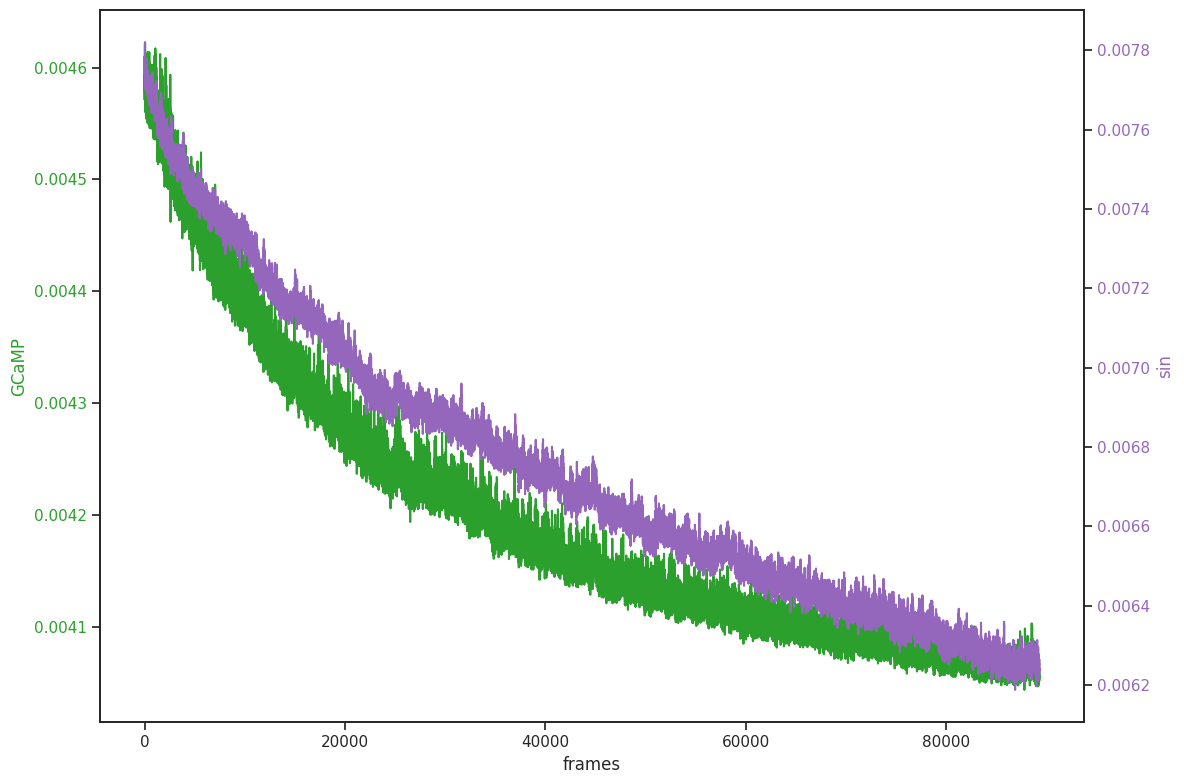

In [29]:
plt.rcParams["figure.figsize"] = (12,8)  
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('frames')
ax1.set_ylabel('GCaMP', color=color)
ax1.plot(raw_signal, color=color)
ax1.tick_params(axis='y', labelcolor=color)
baseline_fluorescence
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(raw_reference, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.set_dpi(100)
fig.tight_layout() 
plt.show()

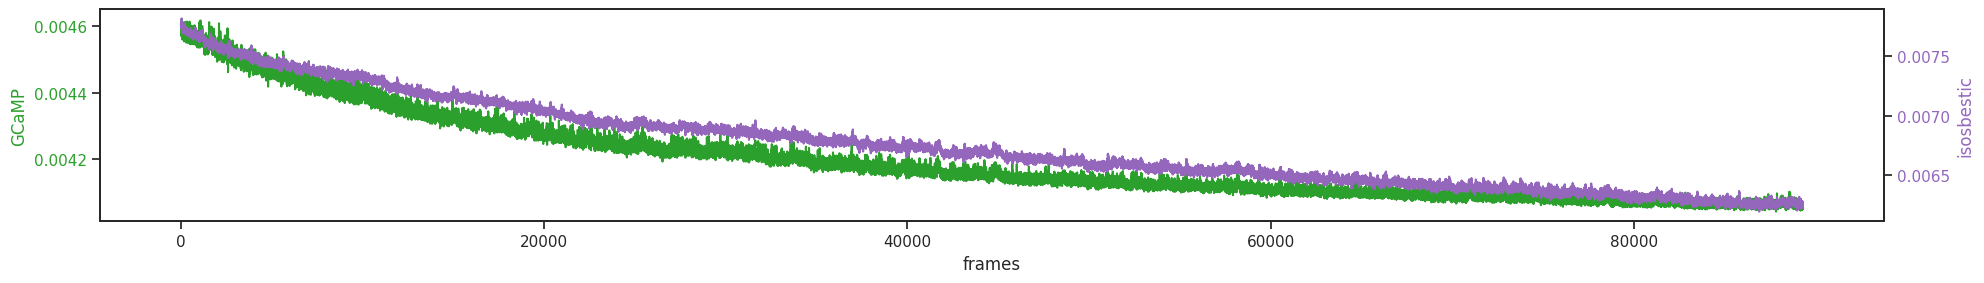

In [30]:
plt.rcParams["figure.figsize"] = (20,3)  
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('frames')
ax1.set_ylabel('GCaMP', color=color)
ax1.plot(raw_signal, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('isosbestic', color=color)  # we already handled the x-label with ax1
ax2.plot(raw_reference, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.set_dpi(100)
fig.tight_layout() 
plt.show() 

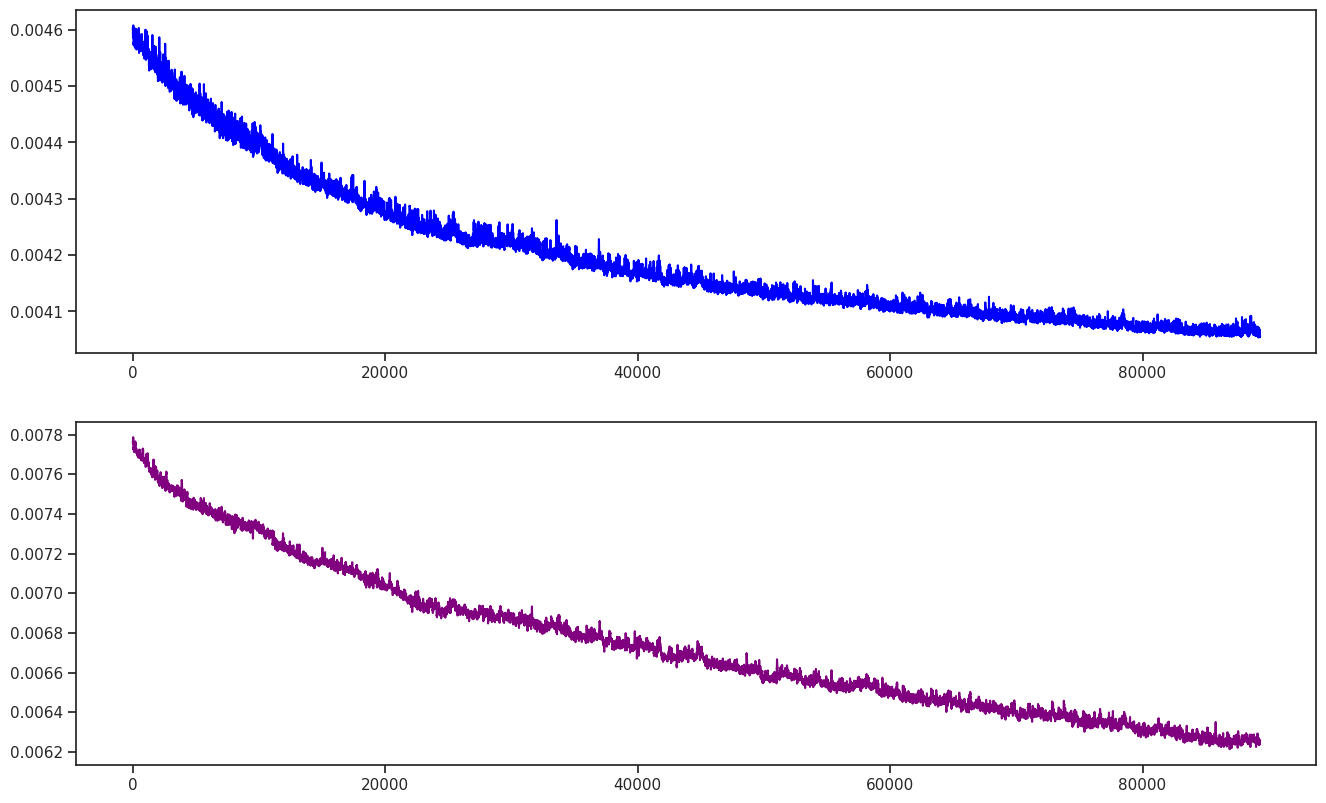

In [31]:
# %%
#===========================================================================
#      6.1 PHOTOMETRY SIGNAL PROCESSING - according to the GitHub code
#===========================================================================
""" 
1. Smooth
""" 
smooth_win = 10
smooth_reference = smooth_signal(raw_reference, smooth_win)
smooth_signal = smooth_signal(raw_signal, smooth_win) 

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(211)
ax1.plot(smooth_signal,'blue',linewidth=1.5)
ax2 = fig.add_subplot(212)
ax2.plot(smooth_reference,'purple',linewidth=1.5) 
#===========================

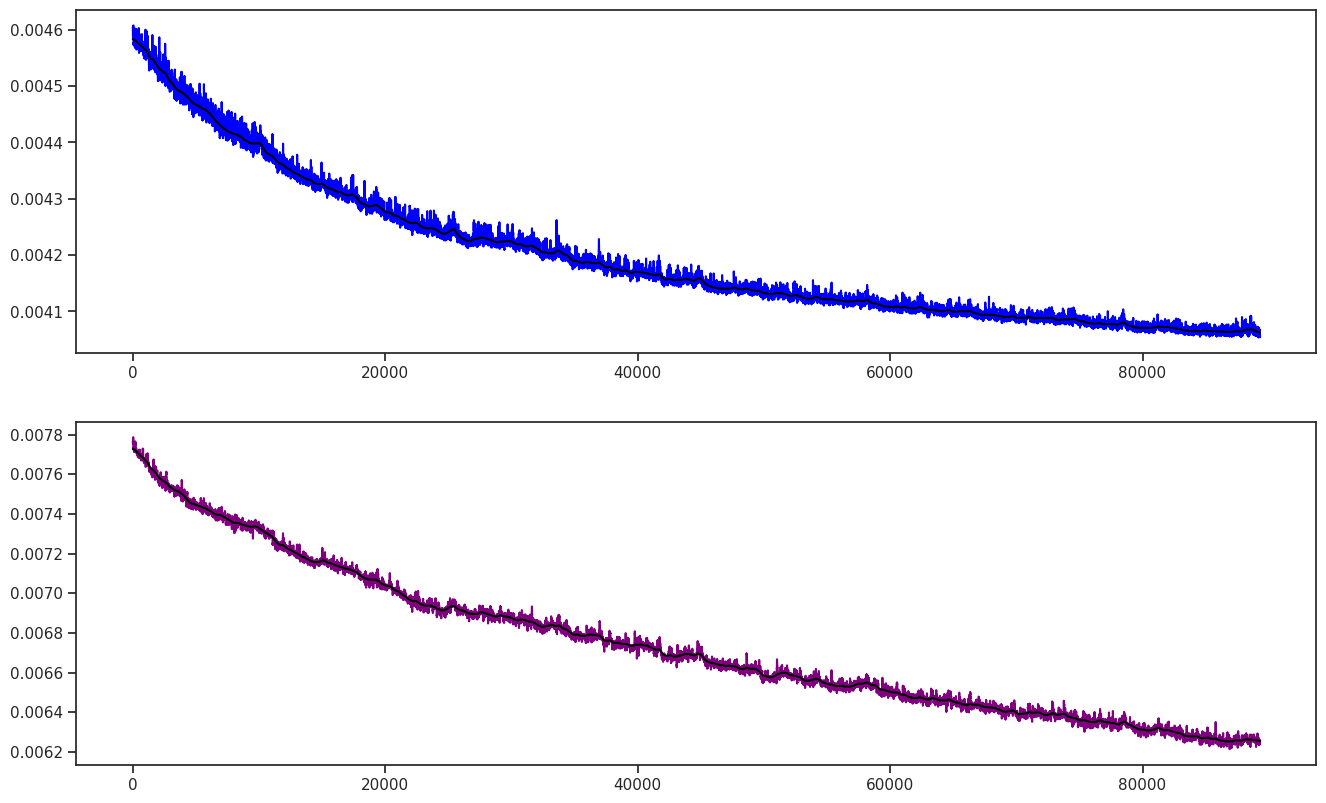

In [32]:
#%% 
""" 
2. Find the baseline
""" 
lambd = 5e4 # Adjust lambda to get the best fit
porder = 1
itermax = 50
r_base=airPLS(smooth_reference.T,lambda_=lambd,porder=porder,itermax=itermax)
s_base=airPLS(smooth_signal,lambda_=lambd,porder=porder,itermax=itermax)

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(211)
ax1.plot(smooth_signal,'blue',linewidth=1.5)
ax1.plot(s_base,'black',linewidth=1.5)
ax2 = fig.add_subplot(212)
ax2.plot(smooth_reference,'purple',linewidth=1.5)
ax2.plot(r_base,'black',linewidth=1.5) 
#===========================

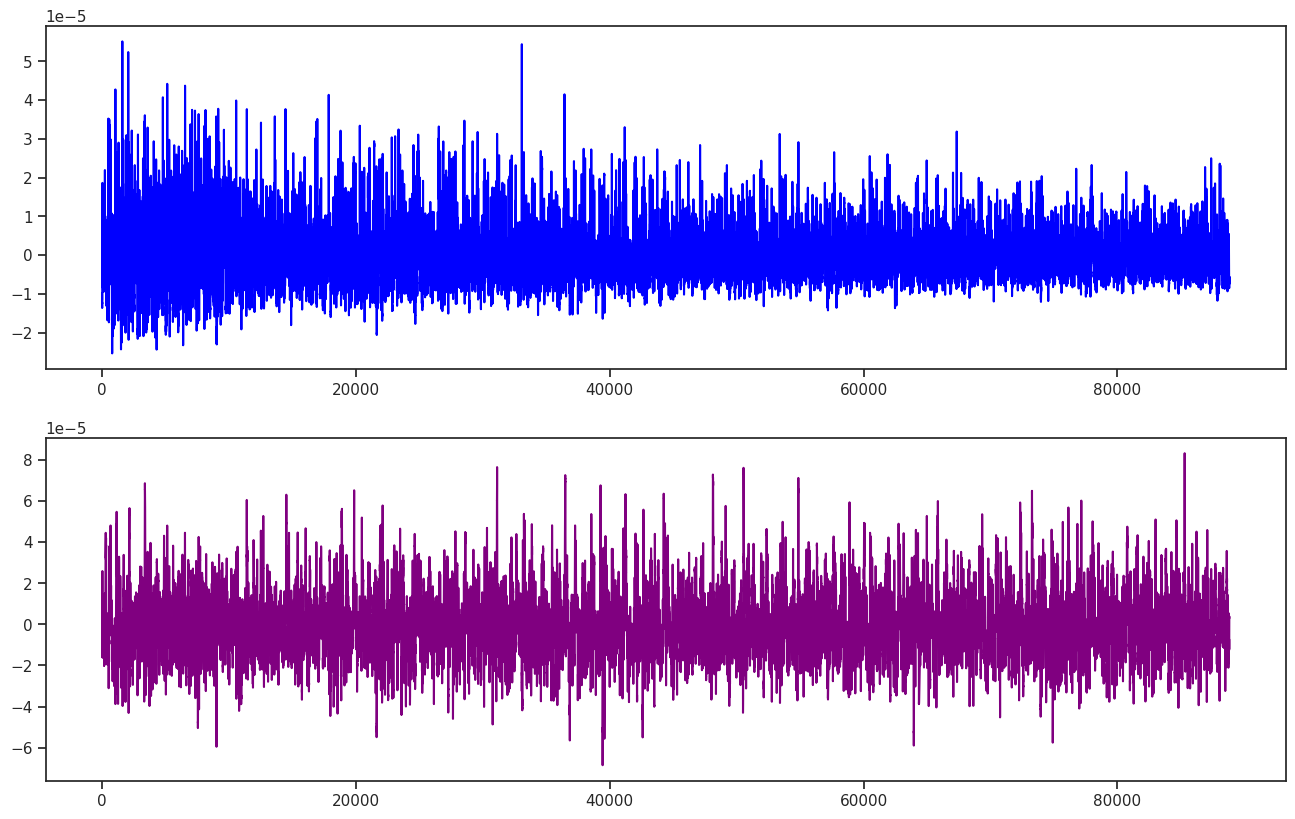

In [33]:
#%% 
""" 
3. Remove the baseline and the beginning of the recordings
""" 
remove=500
reference = (smooth_reference[remove:] - r_base[remove:])
signal = (smooth_signal[remove:] - s_base[remove:]) 
timestamps_bpod = raw_timestamps_bpod[remove:]
timestamps_nph_470 = raw_timestamps_nph_470[remove:] 
timestamps_nph_415 = raw_timestamps_nph_415[remove:]
#KB ADDED 

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(211)
ax1.plot(signal,'blue',linewidth=1.5)
ax2 = fig.add_subplot(212)
ax2.plot(reference,'purple',linewidth=1.5) 
#===========================

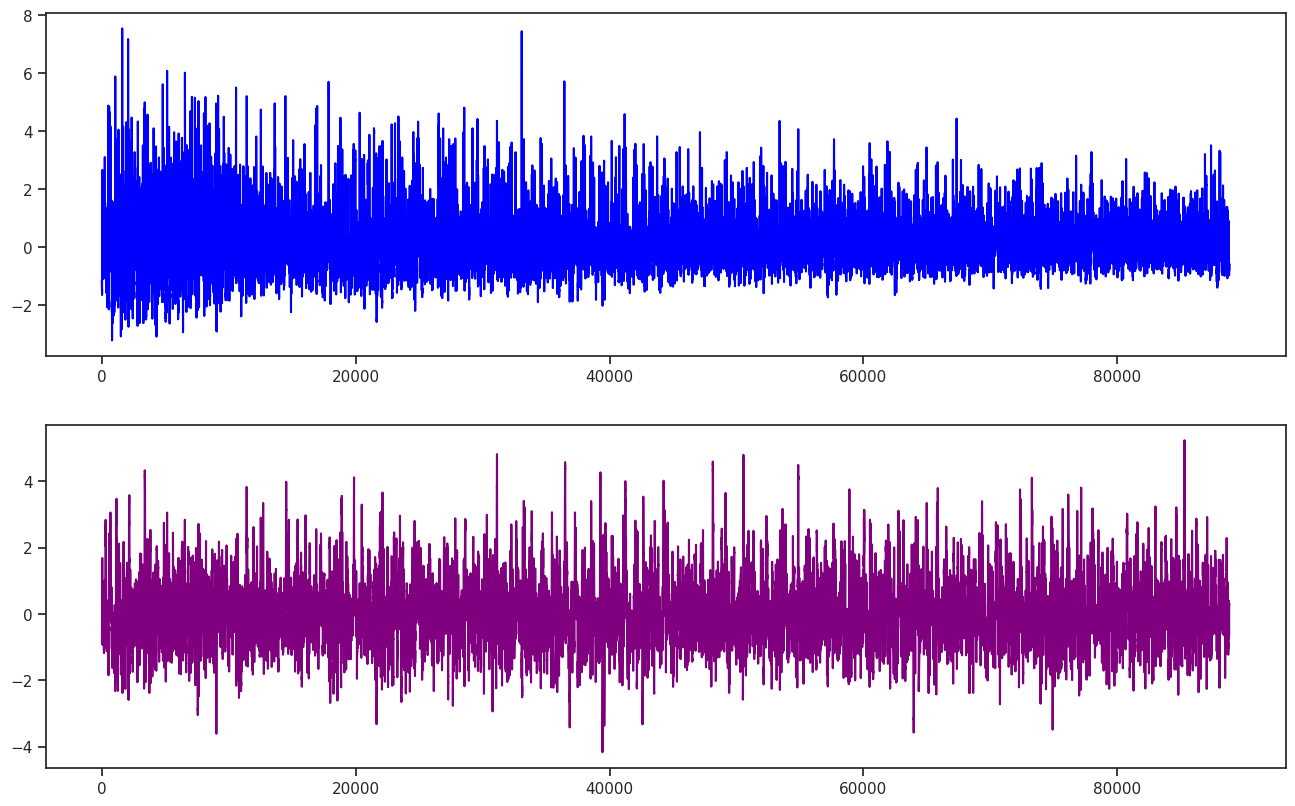

In [34]:
#%% 
""" 
4. Standardize signals
""" 
z_reference = (reference - np.median(reference)) / np.std(reference)
z_signal = (signal - np.median(signal)) / np.std(signal) 

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(211)
ax1.plot(z_signal,'blue',linewidth=1.5)
ax2 = fig.add_subplot(212)
ax2.plot(z_reference,'purple',linewidth=1.5) 
#===========================

In [35]:
#%% 
""" 
5. Fit reference signal to calcium signal using linear regression
""" 
from sklearn.linear_model import Lasso
lin = Lasso(alpha=0.0001,precompute=True,max_iter=1000,
            positive=True, random_state=9999, selection='random')
n = len(z_reference)
lin.fit(z_reference.reshape(n,1), z_signal.reshape(n,1))
#===========================

timestamps_nph_470 = timestamps_nph_470.reset_index(drop=True)

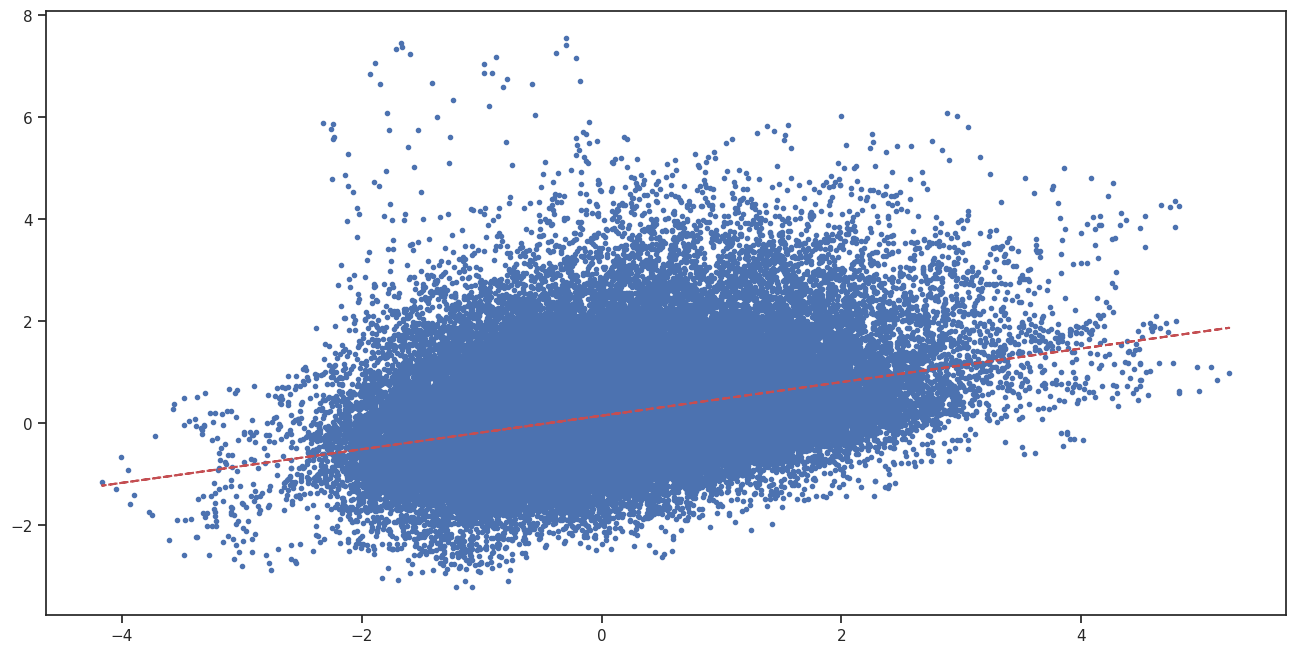

In [36]:
#%% 
""" 
6. Align reference to signal
""" 
z_reference_fitted = lin.predict(z_reference.reshape(n,1)).reshape(n,) 

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111)
ax1.plot(z_reference,z_signal,'b.')
ax1.plot(z_reference,z_reference_fitted, 'r--',linewidth=1.5) 

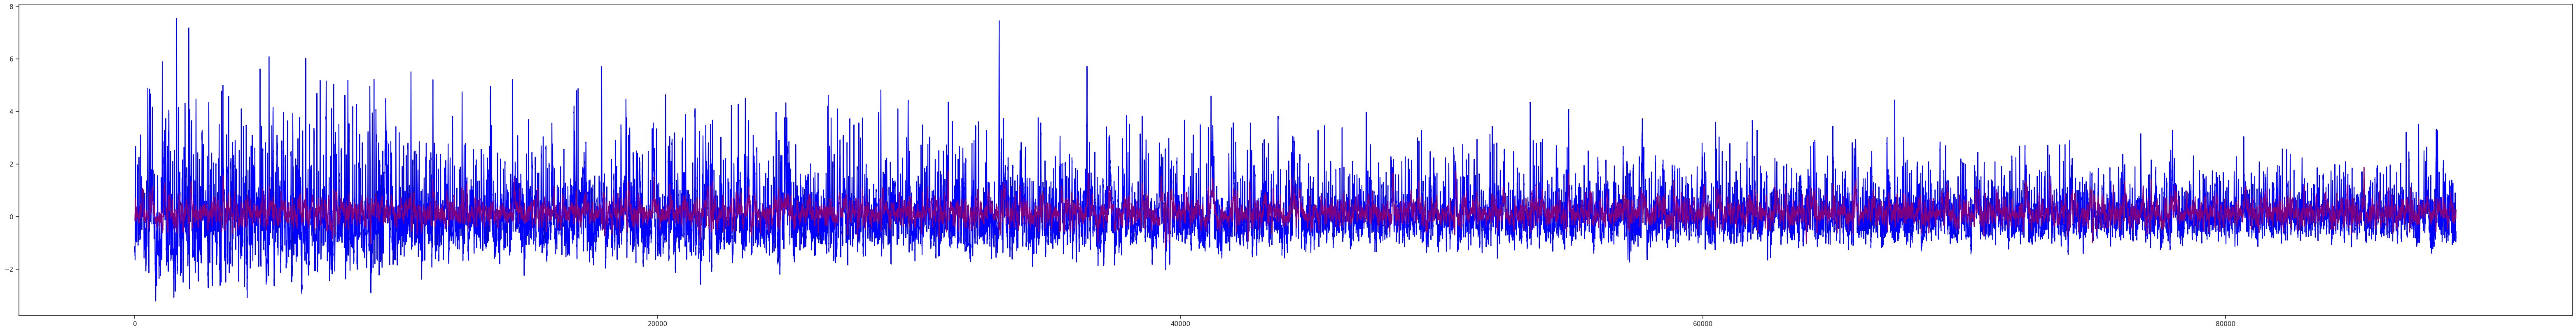

In [111]:
#%%
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111)
ax1.plot(z_signal,'blue')
ax1.plot(z_reference_fitted,'purple') 
#===========================


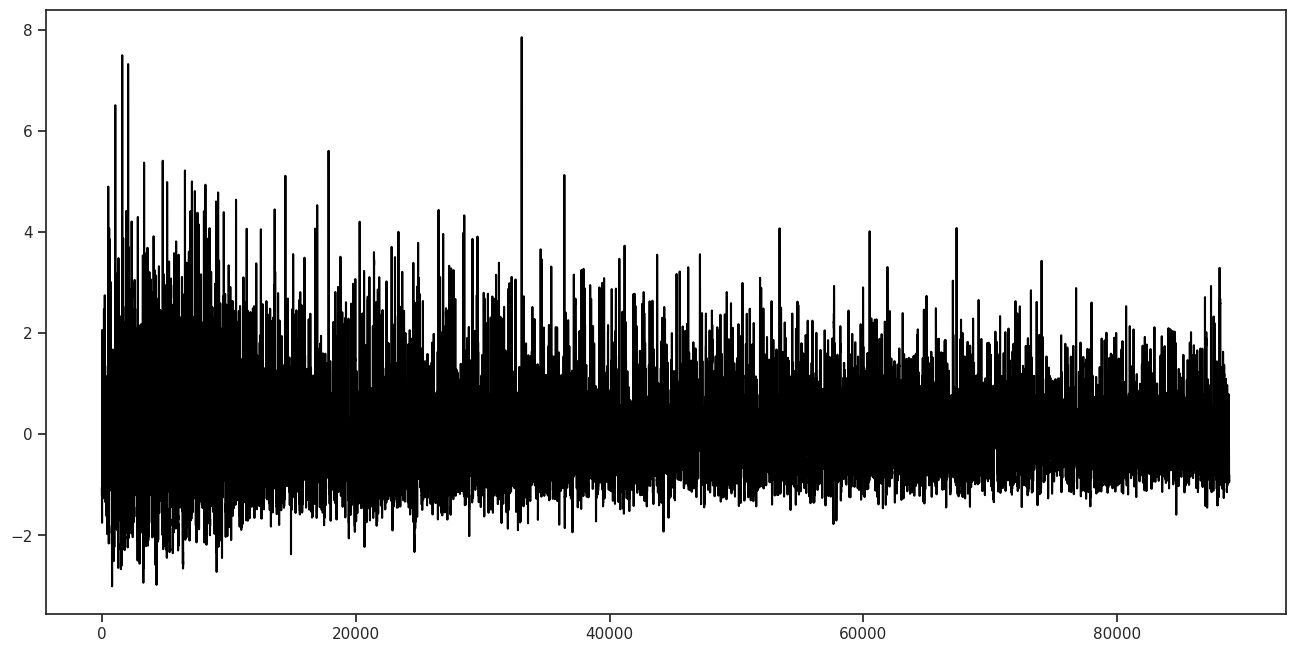

In [38]:
#%% 
""" 
7. Calculate z-score dF/F 
"""
zdFF = (z_signal - z_reference_fitted)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111)
ax1.plot(zdFF,'black')

In [39]:
timestamps_nph_470 = timestamps_nph_470.reset_index(drop=True)
timestamps_nph_415 = timestamps_nph_415.reset_index(drop=True)
timestamps_bpod=timestamps_bpod.reset_index(drop=True)
df = pd.DataFrame(timestamps_nph_470)
df = df.rename(columns={'Timestamp': 'timestamps_nph_470'})
df = df.reset_index() 
df["timestamps_nph_415"] = timestamps_nph_415
df["timestamps_bpod"] = timestamps_bpod 
df["zdFF"] = zdFF 

In [40]:
""" 7.2 adding the raw_reference and the raw_signal """
raw_reference=raw_reference[remove:len(raw_reference)]
raw_signal=raw_signal[remove:len(raw_signal)]
df["raw_reference"] = raw_reference
df["rawsignal"] = raw_signal 

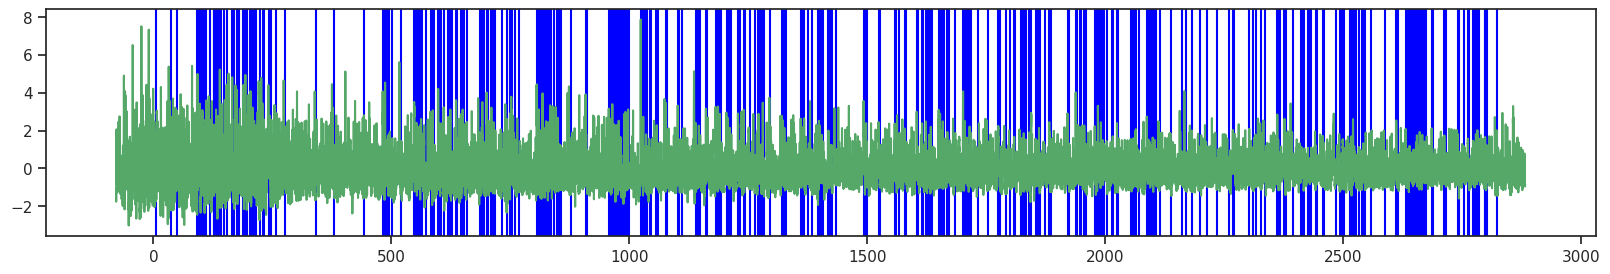

In [42]:
#%%
""" 7.3 Removing extra TTLs (which are there due to the photometry signal removal during the processing) """
""" 7.3.1 check the data """ 
df_ttl = pd.DataFrame(raw_TTL_nph, columns=["ttl_nph"])
df_ttl["ttl_bpod"] = raw_TTL_bpod 

xcoords = df_ttl['ttl_bpod']
for xc in zip(xcoords):
    plt.axvline(x=xc, color='blue')
plt.rcParams.update({'font.size': 22})
plt.plot(df['timestamps_bpod'],df['zdFF'], color = 'g') 
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [71]:
""" search the idx where "event_test" fits in "df_test" in a sorted way """
array_timestamps_bpod = np.array(df.timestamps_bpod) #pick the nph timestamps transformed to bpod clock 
event_test = np.array(df_alldata.intervals_0) #pick the intervals_0 timestamps 
idx_event = np.searchsorted(array_timestamps_bpod, event_test) #check idx where they would be included, in a sorted way 
print(idx_event)


[ 2500  3477  3847  5210  5372  5527  5702  5949  6162  6275  6380  6503
  6618  6808  6965  7405  7631  7756  8004  8117  8230  8444  8676  8810
  9106  9318  9644  9784 10094 10674 12627 13719 15653 16901 17037 17215
 17365 17964 18885 19011 19155 19296 19527 19915 20040 20388 20494 20659
 21037 21148 21521 21713 21955 22132 22935 23177 23439 23738 23904 24358
 24666 24826 24937 25133 25393 26615 26717 26831 26958 27062 27191 27327
 27437 27619 27806 27917 28057 28651 29713 31159 31358 31480 31621 31757
 31891 32109 32249 32357 33162 33332 33494 33751 34026 34160 34745 35513
 35648 36543 36691 36811 37259 37888 38021 38134 38622 38792 39315 39640
 39980 40272 40575 40727 40841 41196 42040 42200 43249 43373 43594 43851
 44264 44382 44557 44985 45124 45380 47216 47355 48163 49154 49332 49808
 50557 50882 51049 51205 51325 51430 51944 52080 52188 52479 52864 53470
 53581 53726 53879 54320 54958 55702 56085 56363 56686 57064 57184 57332
 57645 58046 58262 58566 58902 60061 60588 60814 60

In [72]:
""" create a column with the trial number in the nph df """
df["trial_number"] = 0 #create a new column for the trial_number 
# for i in idx_event: 
#     df["trial_number"][i] = 1 #add an 1 whenever that event occurred (intervals_0) 
df.loc[idx_event,"trial_number"]=1

df["trial_number"] = df.trial_number.cumsum() #sum the [i-1] to i in order to get the trial number 

# df.to_parquet('/home/kcenia/Desktop/testserver_2023_08_31/photometry20230831.parquet') 

In [70]:
df

,index,timestamps_nph_470,timestamps_nph_415,timestamps_bpod,zdFF,raw_reference,rawsignal,trial_number
0,0,9995.750912,9995.767584,-78.673504,-1.211477,NaN,NaN,0
1,1,9995.784224,9995.800896,-78.640192,-1.056266,NaN,NaN,0
2,2,9995.817568,9995.834240,-78.606847,-1.272401,NaN,NaN,0
3,3,9995.850912,9995.867584,-78.573503,-1.153653,NaN,NaN,0
4,4,9995.884224,9995.900896,-78.540191,-1.133244,NaN,NaN,0
...,...,...,...,...,...,...,...,...
88810,88810,12955.998592,12956.015296,2881.498969,-0.909137,0.006265,0.004069,237
88811,88811,12956.031968,12956.048640,2881.532337,-0.923027,0.006267,0.004070,237
88812,88812,12956.065280,12956.081952,2881.565641,-0.925475,0.006282,0.004069,237
88813,88813,12956.098624,12956.115296,2881.598976,-0.904526,0.006271,0.004078,237


In [73]:
df_alldata

,included,stimOnTrigger_times,goCueTrigger_times,repNum,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,...,allContrasts,reactionTime,responseTime,responseTime_mov,reactionTime_c,reactionTime_inc,responseTime_c,responseTime_inc,responseTime_mov_c,responseTime_mov_inc
0,NaN,8.725900,8.826000,0,8.892600,33.497600,1.0,9.018600,NaN,0.5,...,0.5,NaN,24.4790,NaN,NaN,NaN,NaN,24.4790,NaN,NaN
1,NaN,37.662100,37.717900,1,37.734200,45.945100,1.0,37.717800,NaN,0.5,...,0.5,NaN,8.2273,NaN,NaN,NaN,NaN,8.2273,NaN,NaN
2,NaN,50.232700,50.299400,2,50.317700,92.110300,1.0,50.299300,0.5,NaN,...,-0.5,NaN,41.8110,NaN,NaN,NaN,41.8110,NaN,NaN,NaN
3,NaN,95.632600,95.699900,0,95.717400,96.767300,-1.0,95.699800,0.5,NaN,...,-0.5,0.165397,1.0675,0.902103,NaN,0.165397,NaN,1.0675,NaN,0.902103
4,NaN,101.564100,101.631700,1,101.648100,102.850200,-1.0,101.631600,NaN,0.5,...,0.5,0.595597,1.2186,0.623003,0.595597,NaN,1.2186,NaN,0.623003,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,NaN,2765.452099,2765.515799,0,2765.533399,2772.704699,1.0,2765.515699,1.0,NaN,...,-1.0,6.904498,7.1890,0.284502,6.904498,NaN,7.1890,NaN,0.284502,NaN
233,NaN,2776.004499,2776.064299,0,2776.083699,2781.396399,1.0,2776.064199,1.0,NaN,...,-1.0,4.872998,5.3322,0.459202,4.872998,NaN,5.3322,NaN,0.459202,NaN
234,NaN,2784.592899,2784.663699,0,2784.683799,2792.946799,-1.0,2784.663599,1.0,NaN,...,-1.0,8.169598,8.2832,0.113602,NaN,8.169598,NaN,8.2832,NaN,0.113602
235,NaN,2797.259599,2797.331599,1,2797.356299,2797.880499,1.0,2797.331499,1.0,NaN,...,-1.0,0.126698,0.5490,0.422302,0.126698,NaN,0.5490,NaN,0.422302,NaN


In [101]:
PERIEVENT_WINDOW = [-1,2] #never to be changed!!! "constant" 
SAMPLING_RATE = 30 #not a constant: print(1/np.mean(np.diff(array_timestamps_bpod))) #sampling rate 
sample_window = np.arange(PERIEVENT_WINDOW[0] * SAMPLING_RATE, PERIEVENT_WINDOW[1] * SAMPLING_RATE + 1)
n_trials = df_alldata.shape[0]

psth_idx = np.tile(sample_window[:,np.newaxis], (1, n_trials))


event_feedback = np.array(df_alldata.feedback_times) #pick the feedback timestamps 

feedback_idx = np.searchsorted(array_timestamps_bpod, event_feedback) #check idx where they would be included, in a sorted way 


psth_idx += feedback_idx

df.zdFF.values[psth_idx]



array([[-0.11611802, -0.09018977, -0.53430103, ...,  0.53609568,
        -0.76640044, -0.46268474],
       [-0.27277387, -0.24594854, -0.68191602, ...,  0.373752  ,
        -0.6333177 , -0.47280825],
       [-0.45034505, -0.23730727, -0.9937674 , ...,  0.35205821,
        -0.61702767, -0.49074856],
       ...,
       [-0.42034459, -0.24262414, -0.70158748, ..., -0.77015334,
        -1.07322762, -1.32318083],
       [-0.55480803, -0.22290516, -0.51365384, ..., -0.77325646,
        -1.08195243, -1.35409839],
       [-0.84946621, -0.32553006, -0.59271327, ..., -0.8537934 ,
        -0.87027479, -1.45188612]])

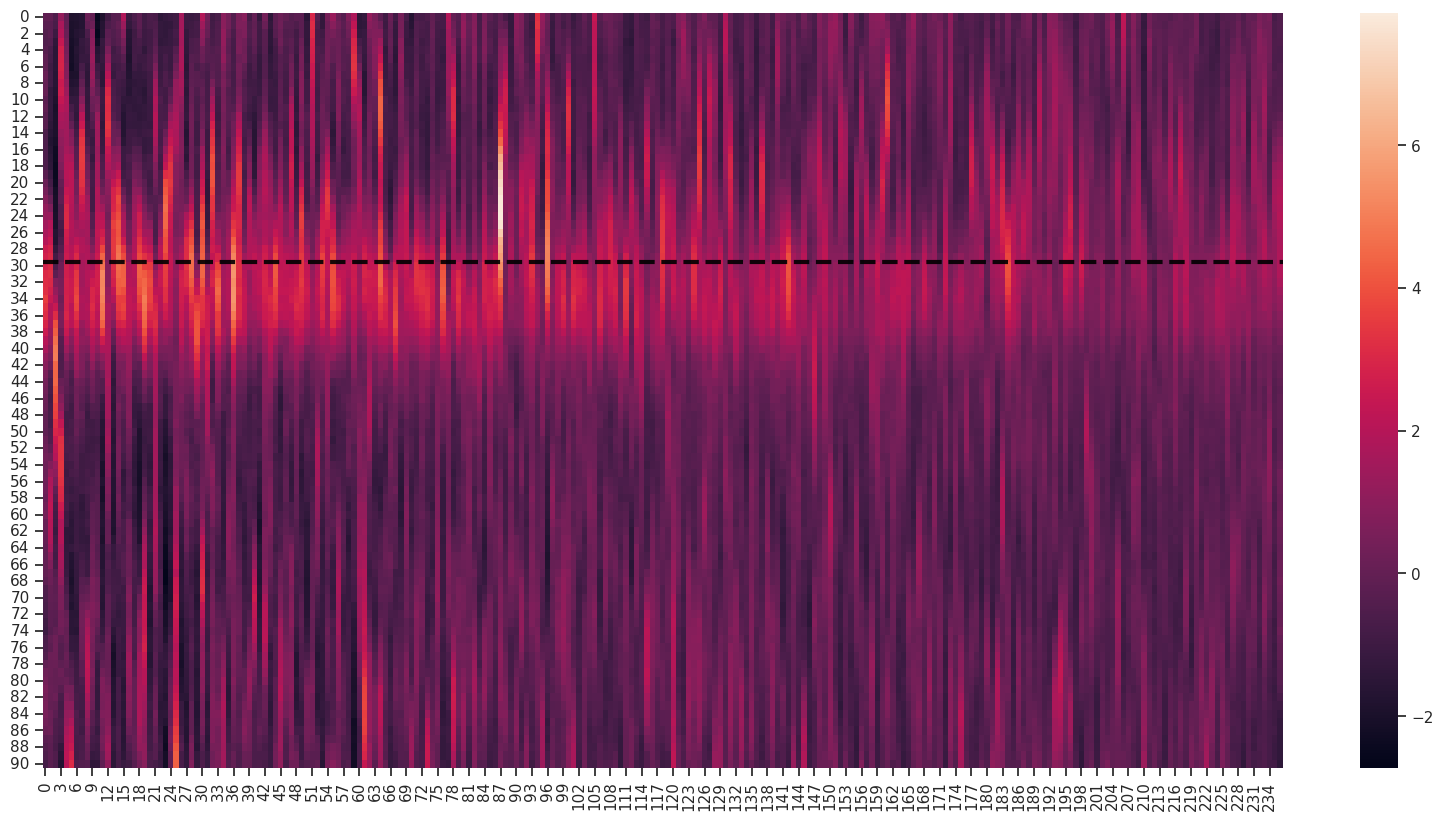

In [115]:
sns.heatmap(df.zdFF.values[psth_idx])
# sns.heatmap(df.zdFF.values[psth_idx].T)

plt.axhline(y=30, color = "black", alpha=0.9, linewidth = 3, linestyle="dashed")



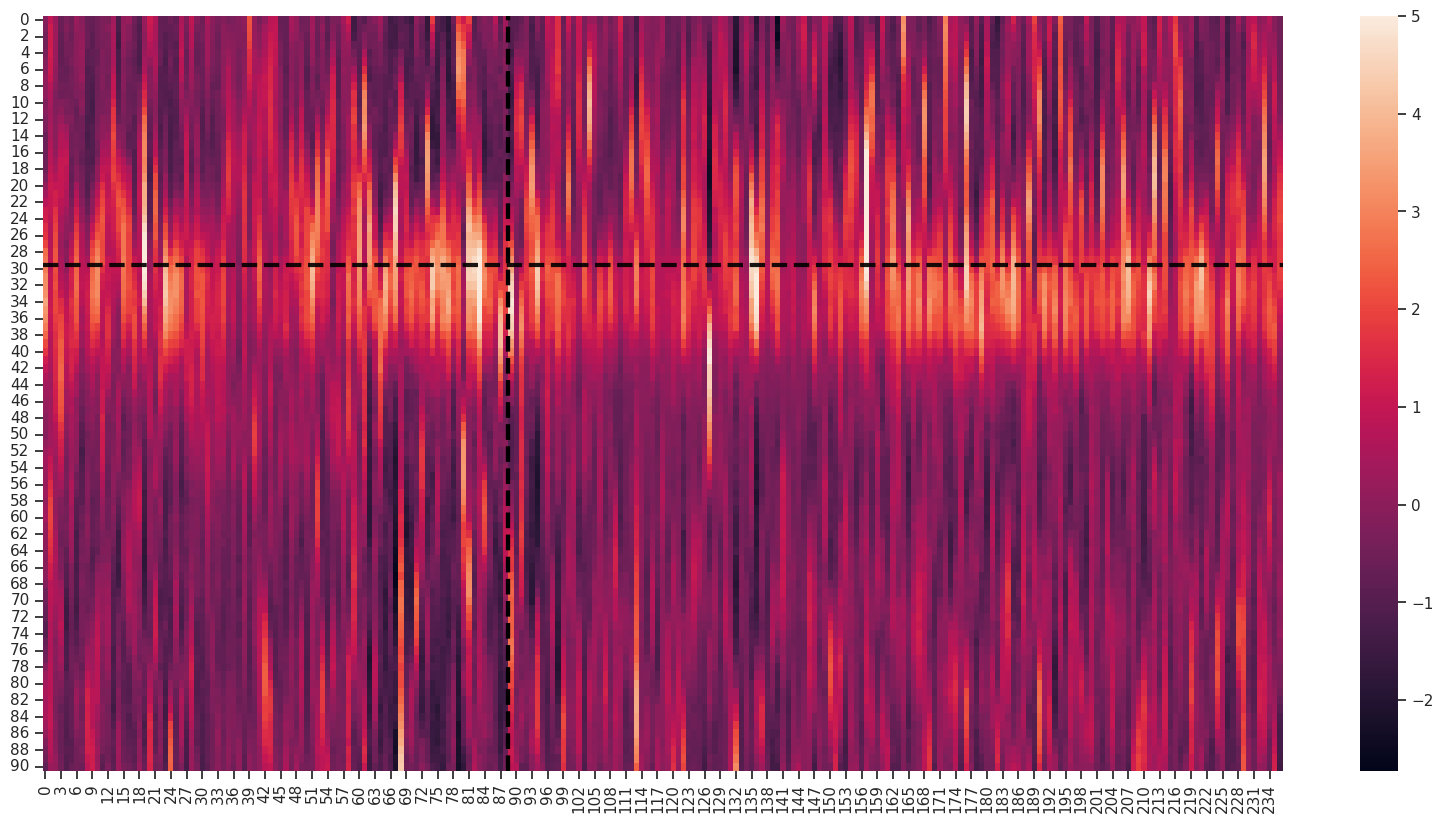

In [124]:
trial_index = np.argsort(df_alldata.feedbackType)
sns.heatmap(df.zdFF.values[psth_idx][:,trial_index], vmax=5)

plt.axvline(x = np.sum(df_alldata.feedbackType < 1), color = "black", alpha=0.9, linewidth = 3, linestyle="dashed") #trials before are incorrect
# plt.axvline(x = np.sum(df_alldata.feedbackType < 0), color = "black", alpha=0.9, linewidth = 3, linestyle="dashed") 
plt.axhline(y = 30, color = "black", alpha=0.9, linewidth = 3, linestyle="dashed")


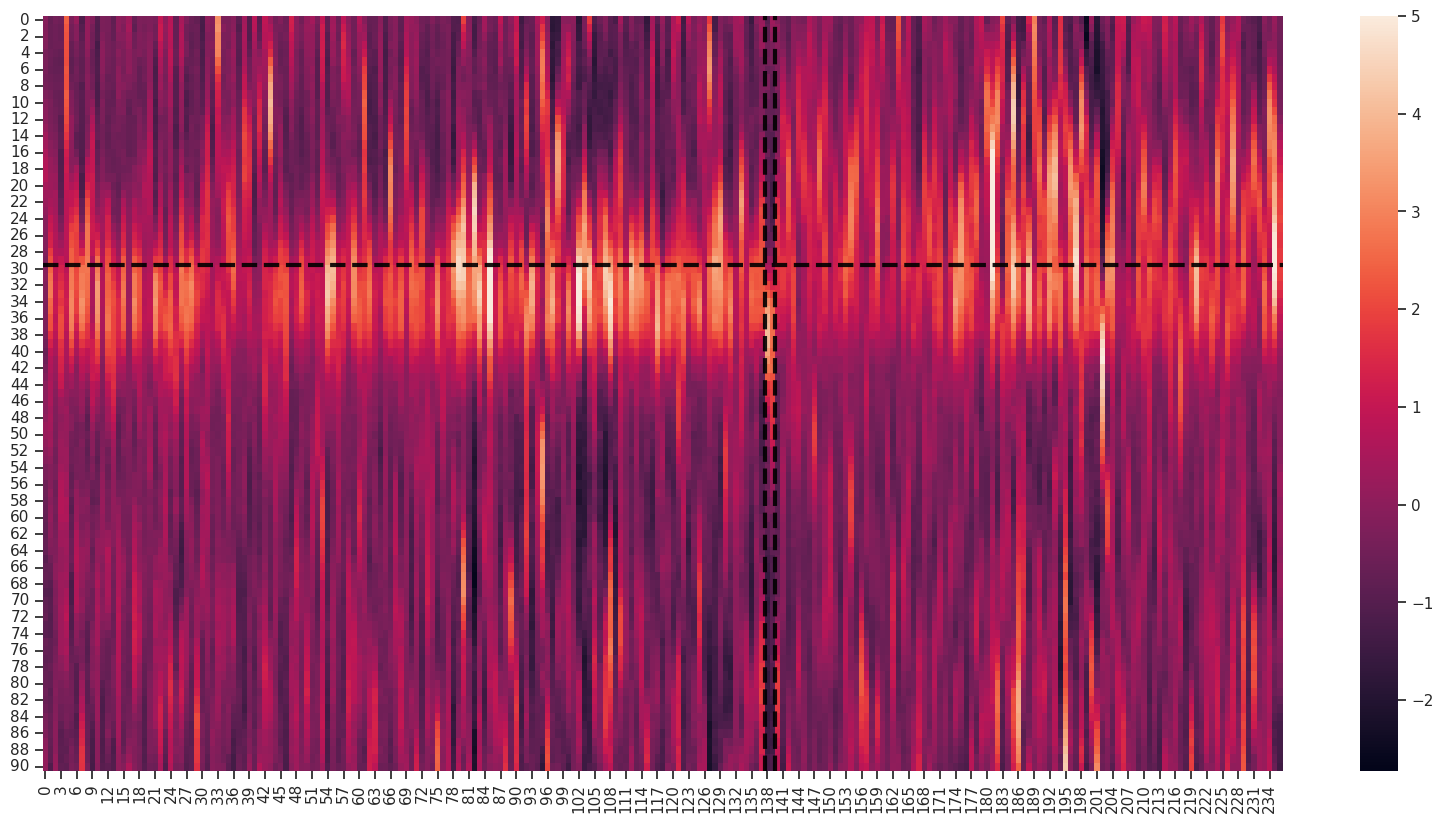

In [125]:
trial_index = np.argsort(df_alldata.choice)
sns.heatmap(df.zdFF.values[psth_idx][:,trial_index], vmax=5)

plt.axvline(x = np.sum(df_alldata.choice < 1), color = "black", alpha=0.9, linewidth = 3, linestyle="dashed") #trials before are incorrect
plt.axvline(x = np.sum(df_alldata.choice < 0), color = "black", alpha=0.9, linewidth = 3, linestyle="dashed") 
plt.axhline(y = 30, color = "black", alpha=0.9, linewidth = 3, linestyle="dashed") 

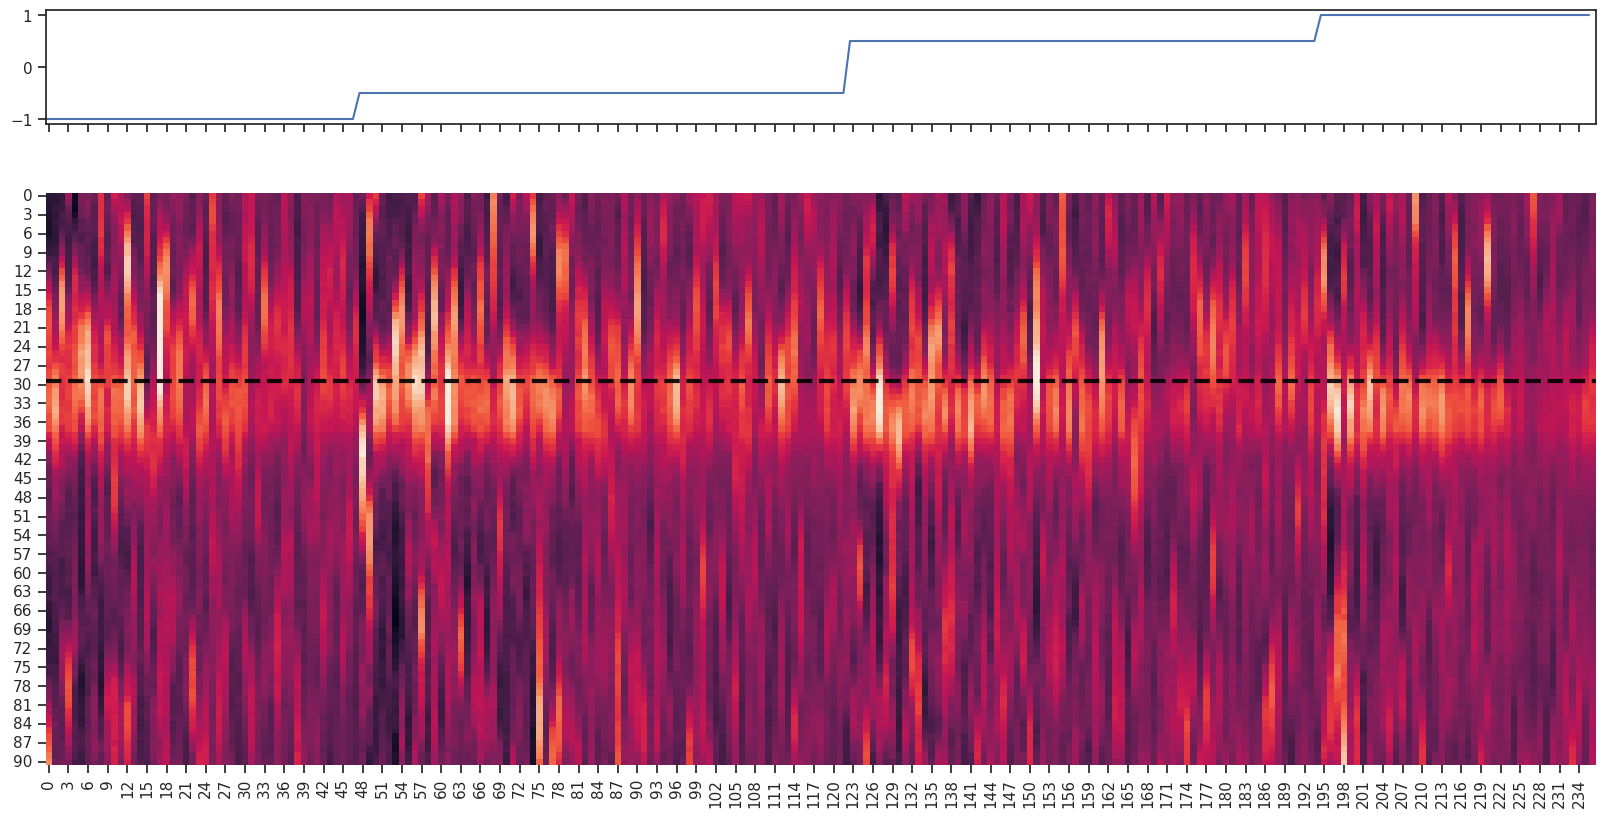

In [154]:
behav_value = df_alldata.allContrasts.values
fig, axs = plt.subplots(2,1,gridspec_kw={"height_ratios":(1,5)}, sharex = True)
trial_index = np.lexsort((np.arange(n_trials), behav_value))
sns.heatmap(df.zdFF.values[psth_idx][:,trial_index], vmax=5, ax = axs[1], cbar=False)
axs[0].plot(behav_value[trial_index])

plt.axhline(y = 30, color = "black", alpha=0.9, linewidth = 3, linestyle="dashed") 

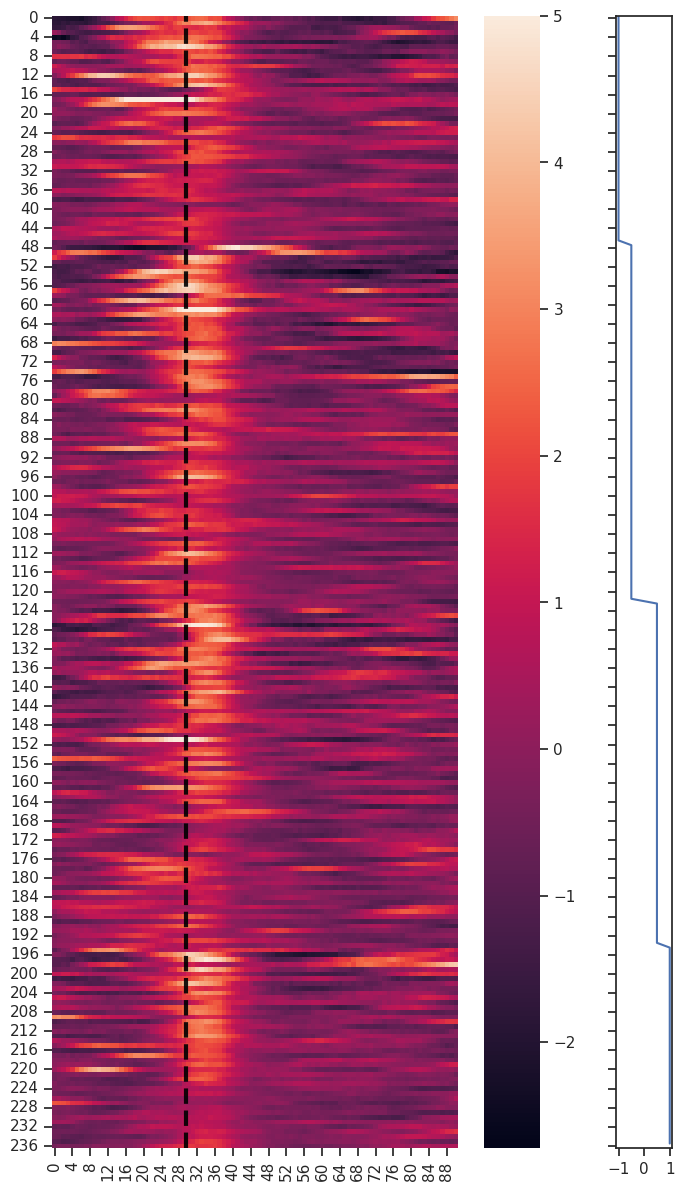

In [172]:
behav_value = df_alldata.allContrasts.values
fig, axs = plt.subplots(1,2,gridspec_kw={"width_ratios":(9,1)}, sharey = True,figsize=(8,15))
trial_index = np.lexsort((np.arange(n_trials), behav_value))
sns.heatmap(df.zdFF.values[psth_idx][:,trial_index].T, vmax=5, ax = axs[0], cbar=True)
axs[1].plot(behav_value[trial_index], np.arange(n_trials))

axs[0].axvline(x = 30, color = "black", alpha=0.9, linewidth = 3, linestyle="dashed") 

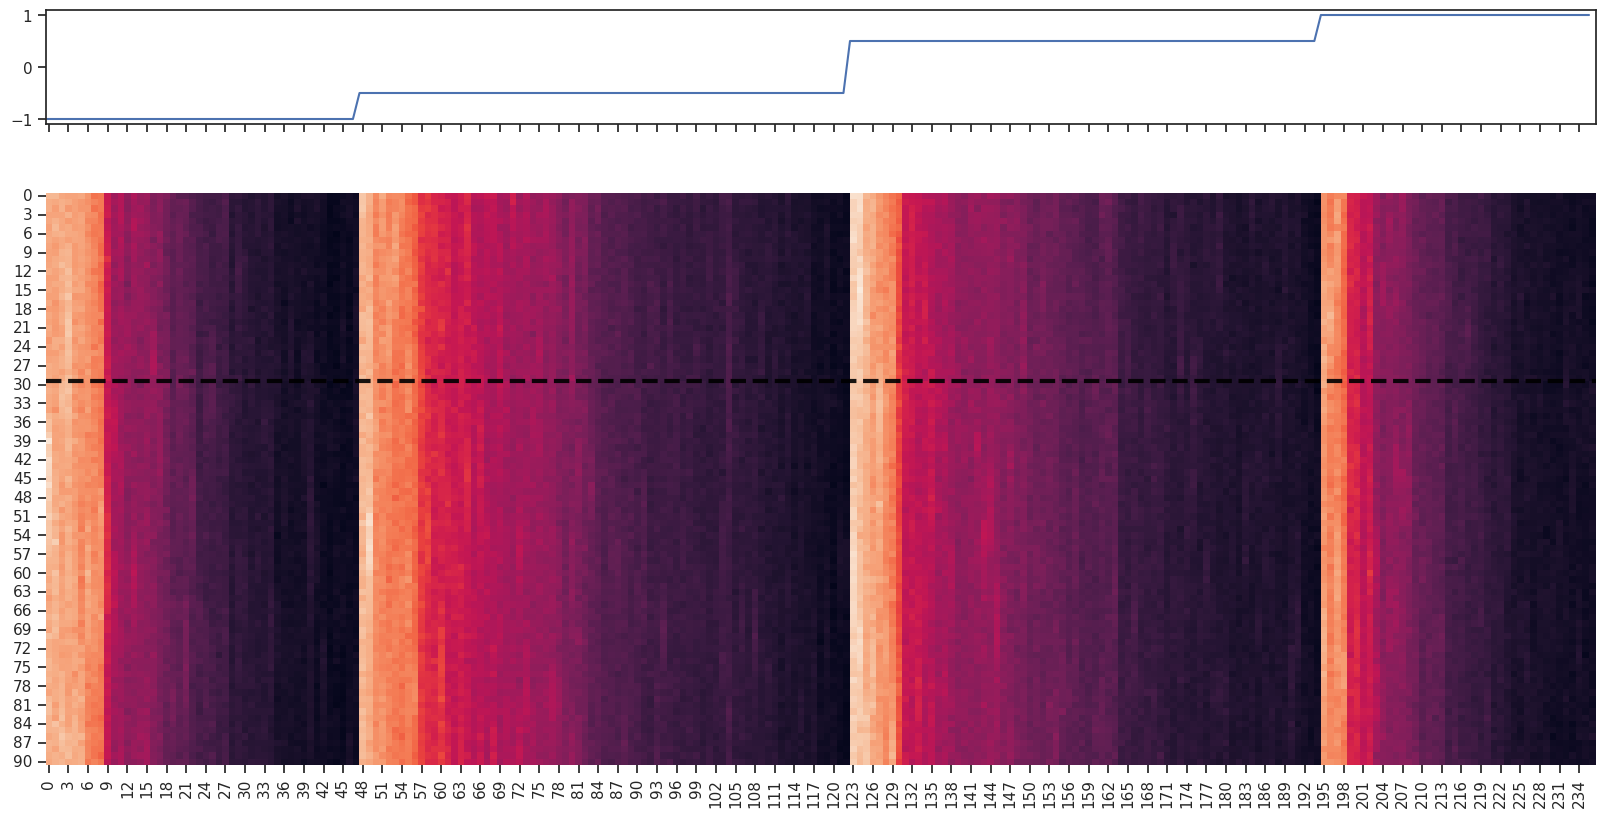

In [146]:
behav_value = df_alldata.allContrasts.values
fig, axs = plt.subplots(2,1,gridspec_kw={"height_ratios":(1,5)}, sharex = True)
trial_index = np.lexsort((np.arange(n_trials), behav_value))
sns.heatmap(df.rawsignal.values[psth_idx][:,trial_index], ax = axs[1], cbar=False)
axs[0].plot(behav_value[trial_index])

plt.axhline(y = 30, color = "black", alpha=0.9, linewidth = 3, linestyle="dashed") 

In [137]:
trial_index

array([  0,   1,   4,   9,  11,  16,  21,  29,  38,  42,  45,  48,  49,
        54,  56,  60,  65,  66,  67,  70,  71,  74,  75,  82,  85,  89,
        91,  95,  96,  97,  98,  99, 105, 106, 112, 113, 114, 116, 118,
       122, 123, 139, 146, 147, 149, 153, 154, 156, 166, 167, 169, 175,
       180, 181, 182, 183, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 197, 198, 199, 215, 216, 231,  12,  18,  19,  25,  33,  34,
        43,  44,  68,  79,  80,  81,  84,  86,  94, 101, 102, 109, 111,
       126, 127, 136, 137, 138, 143, 161, 162, 168, 174, 201, 202, 203,
       206, 207, 214, 219, 220, 221, 222, 223, 224, 225,   2,   3,   5,
         6,   7,   8,  10,  13,  14,  15,  17,  20,  22,  23,  24,  26,
        27,  28,  30,  31,  32,  35,  36,  37,  39,  40,  41,  46,  47,
        50,  51,  52,  53,  55,  57,  58,  59,  61,  62,  63,  64,  69,
        72,  73,  76,  77,  78,  83,  87,  88,  90,  92,  93, 100, 103,
       104, 107, 108, 110, 115, 117, 119, 120, 121, 124, 125, 12

In [126]:
df_alldata.columns

Index(['included', 'stimOnTrigger_times', 'goCueTrigger_times', 'repNum',
       'goCue_times', 'response_times', 'choice', 'stimOn_times',
       'contrastLeft', 'contrastRight', 'feedback_times', 'feedbackType',
       'rewardVolume', 'probabilityLeft', 'firstMovement_times', 'intervals_0',
       'intervals_1', 'allContrasts', 'reactionTime', 'responseTime',
       'responseTime_mov', 'reactionTime_c', 'reactionTime_inc',
       'responseTime_c', 'responseTime_inc', 'responseTime_mov_c',
       'responseTime_mov_inc'],
      dtype='object')